## EDA 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv("BIKE DETAILS.csv")

In [2]:
df

name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
...                                   ...            ...   ...         ...   
1056                            Activa 3g          17000  2010  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1058                   Bajaj Discover 125          15000  2013  Individual   
1059                       Honda CB Shine          12000  2009  Individual   
1060                     Bajaj Pulsar 150          10000  2008  Individual   

          owner  km_driven  ex_showroom_price  
0     1st owner        350                NaN  
1     1st owner       5650                NaN  
2     1st owner      12000           148114.0  
3     1st owner      23000            89643.0  
4     2nd owner      21000                NaN  
...         ...        ...                ...  
1056  1st owner     500000            52000.0  
1057  1st owner      33000            51000.0  
1058  2nd owner      35000            57000.0  
1059  1st owner      53000            58000.0  
1060  1st owner      92233            75000.0  

[1061 rows x 7 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


# 1. What is the range of selling prices in the dataset

In [9]:
range = max(df["selling_price"]) - min(df["selling_price"])

In [10]:
range

755000

# 2. What is the median selling price for bikes in the dataset.

In [11]:
median = np.median(df["selling_price"])
median

np.float64(45000.0)

# 3. What is the most common seller type.

In [12]:
df["seller_type"].value_counts()

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

# 4. How many bikes have driven more than 50,000 kilometers.

In [13]:
driven_km = len(df["km_driven"].value_counts() > 50000)
driven_km

304

# 5. What is the average km_driven value for each ownership type.

In [14]:
avg_km = np.mean(df["km_driven"])
avg_km

np.float64(34359.83317624882)

# 6. What proportion of bikes are from the year 2015 or older.

In [15]:
bike_years = df['year']

condition = bike_years <= 2015

proportion = np.mean(condition)

print("Proportion of bikes from 2015 or older:", proportion)

Proportion of bikes from 2015 or older: 0.5664467483506126


# 7. What is the trend of missing values across the dataset.

Missing values in each column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Percentage of missing values:
name                  0.0
selling_price         0.0
year                  0.0
seller_type           0.0
owner                 0.0
km_driven             0.0
ex_showroom_price    41.0
dtype: float64


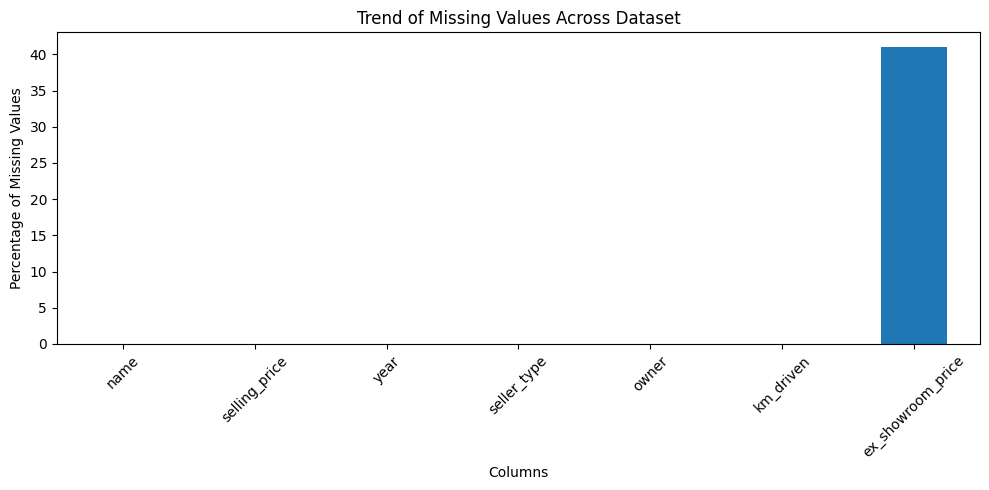

In [16]:
missing_counts = df.isnull().sum()
print("Missing values in each column:")
print(missing_counts)

missing_percentage = (df.isnull().mean() * 100).round(2)
print("\nPercentage of missing values:")
print(missing_percentage)

plt.figure(figsize=(10,5))
missing_percentage.plot(kind='bar')
plt.title("Trend of Missing Values Across Dataset")
plt.xlabel("Columns")
plt.ylabel("Percentage of Missing Values")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 8. What is the highest ex_showroom_price recorded, and for which bike.

In [17]:
max_price = df['ex_showroom_price'].max()

bike_with_max_price = df[df['ex_showroom_price'] == max_price]

print("Highest Ex-Showroom Price:", max_price)
print(f"\nBike(s) with Highest Price:{bike_with_max_price}")

Highest Ex-Showroom Price: 1278000.0

Bike(s) with Highest Price:                           name  selling_price  year seller_type      owner  \
134  Harley-Davidson Street Bob         750000  2013  Individual  2nd owner   

     km_driven  ex_showroom_price  
134      12000          1278000.0  


# 9. What is the total number of bikes listed by each seller type.

In [18]:
Total_number = df.groupby("seller_type")["name"].count()
Total_number

seller_type
Dealer           6
Individual    1055
Name: name, dtype: int64

# 10. What is the relationship between selling_price and km_driven for first-owner bikes.

In [19]:
df["selling_price"].value_counts()

selling_price
25000     77
35000     66
50000     63
40000     63
30000     62
          ..
59000      1
205000     1
25500      1
111000     1
31000      1
Name: count, Length: 130, dtype: int64

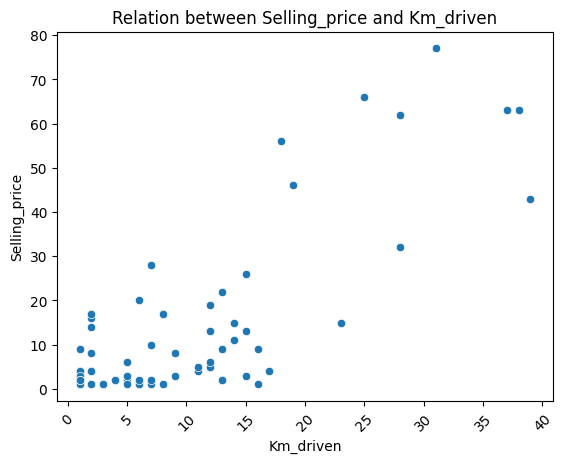

In [20]:
sns.scatterplot(x = df["km_driven"].value_counts(), y = df["selling_price"].value_counts())
plt.title("Relation between Selling_price and Km_driven")
plt.xlabel("Km_driven")
plt.ylabel("Selling_price")
plt.xticks(rotation = 45)
plt.show()

# 11. Identify and remove outliers in the km_driven column using the IQR method.

In [21]:
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
IQR = Q3 - Q1

In [22]:
IQR

np.float64(29500.0)

In [23]:
upper_fence = Q3 + 1.5 * IQR
lower_fence = Q1 - 1.5 * IQR

In [24]:
df[(df["km_driven"] < upper_fence) & (df["km_driven"] > lower_fence)]

name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
...                                   ...            ...   ...         ...   
1054                     Hero  CBZ Xtreme          20000  2010  Individual   
1055                        Bajaj  ct 100          18000  2017  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1058                   Bajaj Discover 125          15000  2013  Individual   
1059                       Honda CB Shine          12000  2009  Individual   

          owner  km_driven  ex_showroom_price  
0     1st owner        350                NaN  
1     1st owner       5650                NaN  
2     1st owner      12000           148114.0  
3     1st owner      23000            89643.0  
4     2nd owner      21000                NaN  
...         ...        ...                ...  
1054  1st owner      50000            78700.0  
1055  1st owner      35000            32000.0  
1057  1st owner      33000            51000.0  
1058  2nd owner      35000            57000.0  
1059  1st owner      53000            58000.0  

[1022 rows x 7 columns]

# 12. Perform a bivariate analysis to visualize the relationship between year and selling_price.

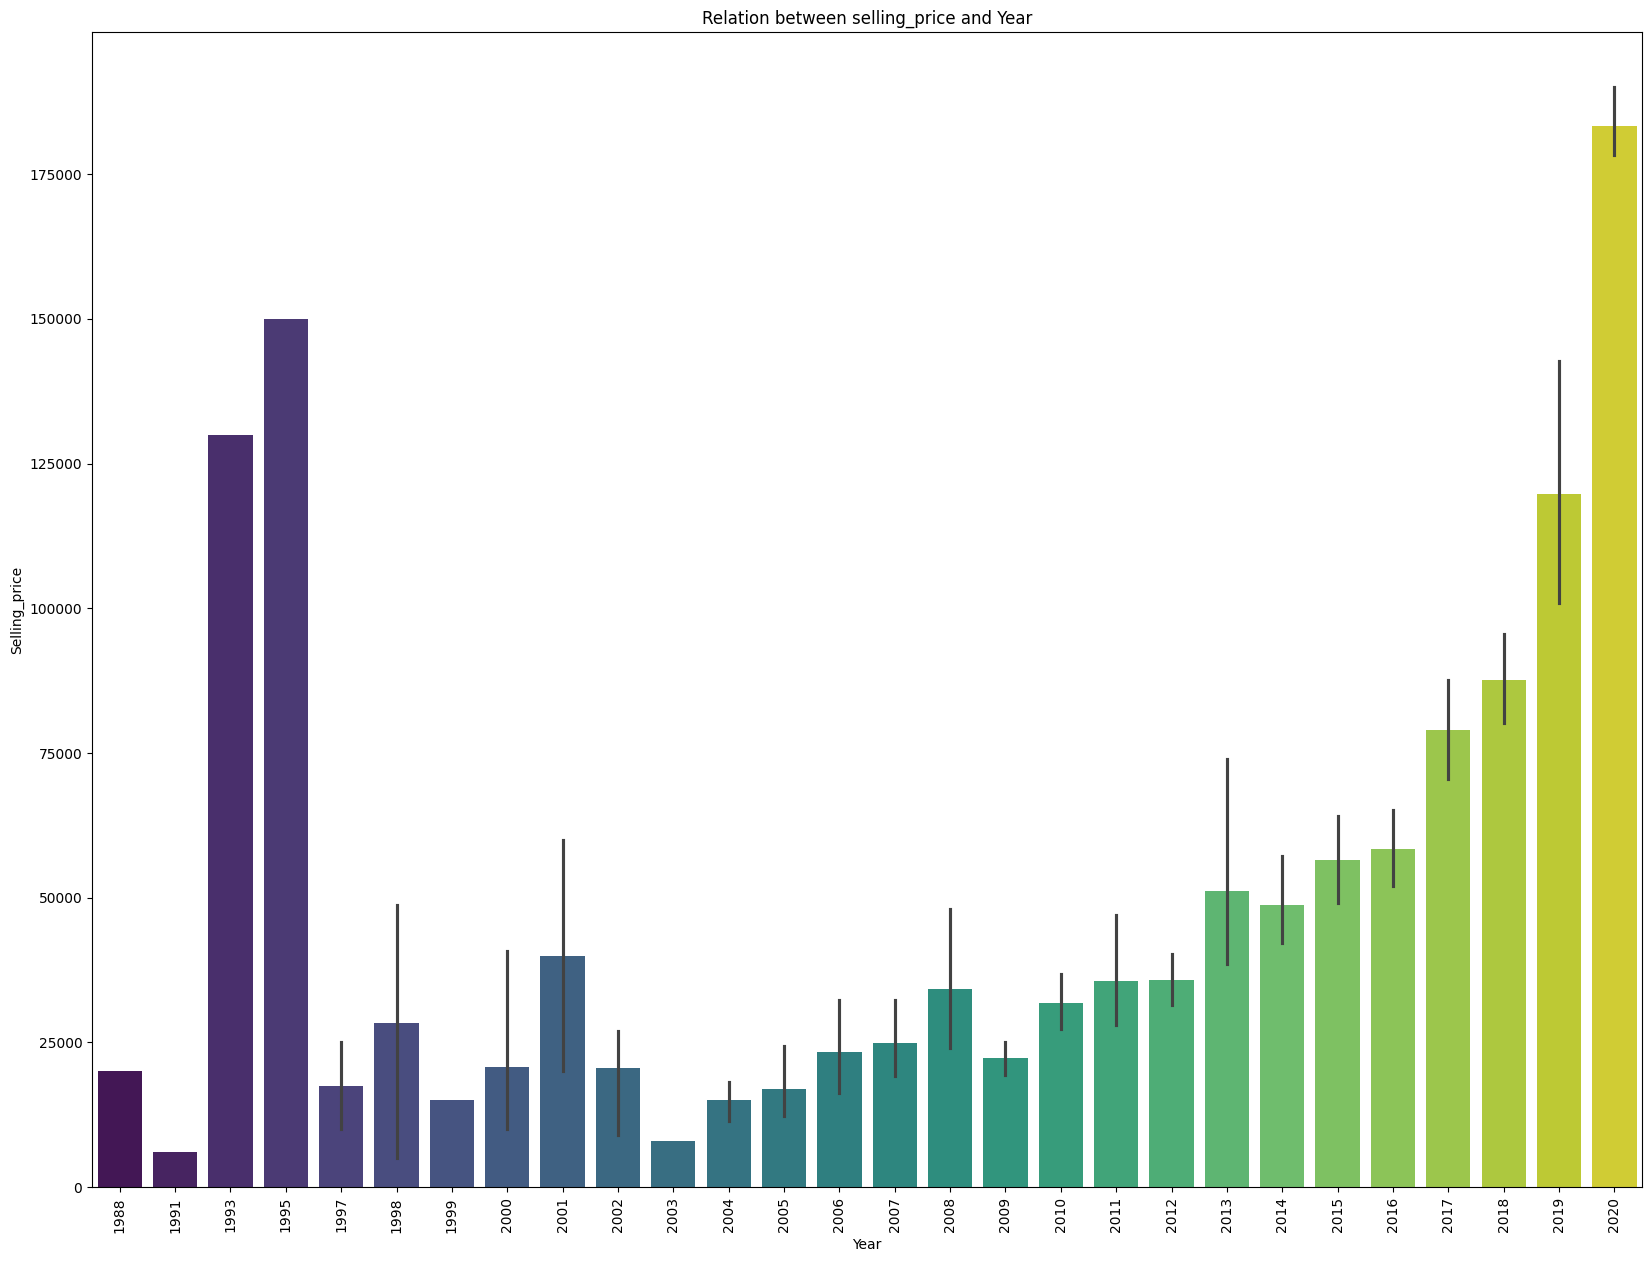

In [25]:
plt.figure(figsize = (20, 15))
sns.barplot(x = "year", y = "selling_price", data = df, palette = "viridis")
plt.title("Relation between selling_price and Year")
plt.xlabel("Year")
plt.ylabel("Selling_price")
plt.xticks(rotation = 90)
plt.show()

# 13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year.

In [26]:
current_year = 2025
df['bike_age'] = current_year - df['year']
df['depreciation'] = df['ex_showroom_price'] - df['selling_price']
avg_dep_by_age = df.groupby('bike_age')['depreciation'].mean().reset_index()

print("Average Depreciation by Bike Age:")
print(avg_dep_by_age)

Average Depreciation by Bike Age:
    bike_age  depreciation
0          5 -34260.000000
1          6   2954.562500
2          7  13023.194805
3          8  22306.082353
4          9  28328.190476
5         10  28013.275000
6         11  34505.606061
7         12  43086.886792
8         13  37317.648649
9         14  47102.666667
10        15  45658.928571
11        16  38227.785714
12        17  54732.428571
13        18  42399.000000
14        19  39664.500000
15        20  44852.000000
16        21  36852.000000
17        22           NaN
18        23           NaN
19        24  34852.000000
20        25           NaN
21        26           NaN
22        27           NaN
23        28           NaN
24        30           NaN
25        32           NaN
26        34           NaN
27        37           NaN


# 14. Which bike names are priced significantly above the average price for their manufacturing year.

In [27]:
df['ex_showroom_price'] = pd.to_numeric(df['ex_showroom_price'], errors='coerce')

year_avg = df.groupby('year')['ex_showroom_price'].mean().reset_index()
year_avg.rename(columns={'ex_showroom_price': 'avg_price'}, inplace=True)

df = df.merge(year_avg, on='year')

df['significantly_above_avg'] = df['ex_showroom_price'] > (df['selling_price'] * 1.20)

result = df[df['significantly_above_avg']][['name', 'year', 'ex_showroom_price', 'avg_price']]

print(result)

                                   name  year  ex_showroom_price     avg_price
3     Yamaha Fazer FI V 2.0 [2016-2018]  2015            89643.0  82563.275000
5                      Honda CB Twister  2010            53857.0  77716.071429
9                    Bajaj Discover 125  2016            60122.0  81925.630952
10                          Yamaha FZ16  2015            78712.0  82563.275000
11                           Honda Navi  2016            47255.0  81925.630952
...                                 ...   ...                ...           ...
1056                          Activa 3g  2010            52000.0  77716.071429
1057                   Honda CB twister  2012            51000.0  70128.135135
1058                 Bajaj Discover 125  2013            57000.0  95435.943396
1059                     Honda CB Shine  2009            58000.0  60870.642857
1060                   Bajaj Pulsar 150  2008            75000.0  74603.857143

[487 rows x 4 columns]


## EDA 2:

# 1. What is the average selling price of cars for each dealer, and how does it compare across different dealers.

In [28]:
df1 = pd.read_csv("car sale.csv")

In [29]:
df1

Car_id        Date Customer Name  Gender  Annual Income  \
0      C_CND_000001    1/2/2022     Geraldine    Male          13500   
1      C_CND_000002    1/2/2022           Gia    Male        1480000   
2      C_CND_000003    1/2/2022        Gianna    Male        1035000   
3      C_CND_000004    1/2/2022       Giselle    Male          13500   
4      C_CND_000005    1/2/2022         Grace    Male        1465000   
...             ...         ...           ...     ...            ...   
23901  C_CND_023902  12/31/2023        Martin    Male          13500   
23902  C_CND_023903  12/31/2023         Jimmy  Female         900000   
23903  C_CND_023904  12/31/2023          Emma    Male         705000   
23904  C_CND_023905  12/31/2023      Victoire    Male          13500   
23905  C_CND_023906  12/31/2023       Donovan    Male        1225000   

                               Dealer_Name    Company       Model  \
0      Buddy Storbeck's Diesel Service Inc       Ford  Expedition   
1                         C & M Motors Inc      Dodge     Durango   
2                              Capitol KIA   Cadillac    Eldorado   
3                   Chrysler of Tri-Cities     Toyota      Celica   
4                        Chrysler Plymouth      Acura          TL   
...                                    ...        ...         ...   
23901                     C & M Motors Inc   Plymouth     Voyager   
23902       Ryder Truck Rental and Leasing  Chevrolet       Prizm   
23903               Chrysler of Tri-Cities        BMW        328i   
23904                    Chrysler Plymouth  Chevrolet       Metro   
23905                      Pars Auto Sales      Lexus       ES300   

                          Engine Transmission       Color  Price ($)  \
0      DoubleÂ Overhead Camshaft         Auto       Black      26000   
1      DoubleÂ Overhead Camshaft         Auto       Black      19000   
2              Overhead Camshaft       Manual         Red      31500   
3              Overhead Camshaft       Manual  Pale White      14000   
4      DoubleÂ Overhead Camshaft         Auto         Red      24500   
...                          ...          ...         ...        ...   
23901          Overhead Camshaft       Manual         Red      12000   
23902  DoubleÂ Overhead Camshaft         Auto       Black      16000   
23903          Overhead Camshaft       Manual         Red      21000   
23904  DoubleÂ Overhead Camshaft         Auto       Black      31000   
23905  DoubleÂ Overhead Camshaft         Auto  Pale White      27500   

       Dealer_No  Body Style    Phone Dealer_Region  
0      06457-3834        SUV  8264678    Middletown  
1      60504-7114        SUV  6848189        Aurora  
2      38701-8047  Passenger  7298798    Greenville  
3      99301-3882        SUV  6257557         Pasco  
4      53546-9427  Hatchback  7081483    Janesville  
...           ...        ...      ...           ...  
23901  60504-7114  Passenger  8583598         Pasco  
23902  06457-3834    Hardtop  7914229    Middletown  
23903  99301-3882      Sedan  7659127    Scottsdale  
23904  53546-9427  Passenger  6030764        Austin  
23905  38701-8047    Hardtop  7020564    Middletown  

[23906 rows x 16 columns]


Average selling price for each dealer:
Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 2

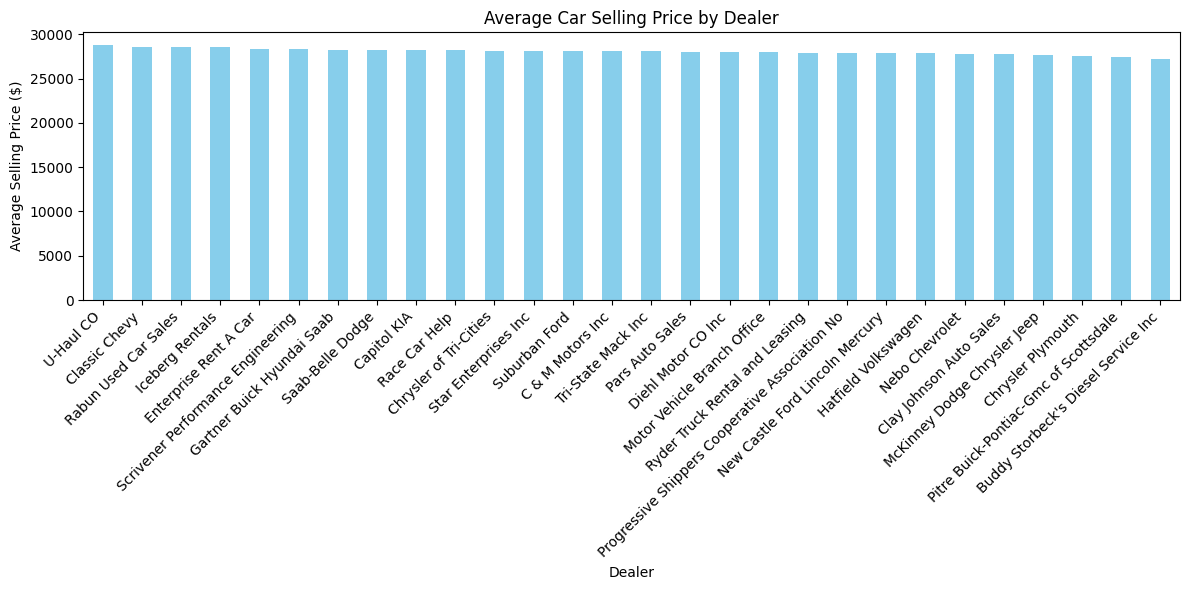


Comparison Analysis:
The dealer with the highest average selling price is 'U-Haul CO' with an average of $28,769.92.
The dealer with the lowest average selling price is 'Buddy Storbeck's Diesel Service Inc' with an average of $27,217.26.
The overall average selling price across all dealers is $28,090.25.
'U-Haul CO' sells cars at an average price $679.67 higher than the market average.


In [30]:
average_price_by_dealer = df1.groupby("Dealer_Name")["Price ($)"].mean()

average_price_by_dealer = average_price_by_dealer.sort_values(ascending=False)

print("\nAverage selling price for each dealer:")
print(average_price_by_dealer)

plt.figure(figsize=(12, 6))
average_price_by_dealer.plot(kind='bar', color='skyblue')
plt.title('Average Car Selling Price by Dealer')
plt.xlabel('Dealer')
plt.ylabel('Average Selling Price ($)')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()

print("\nComparison Analysis:")
highest_price_dealer = average_price_by_dealer.index[0]
lowest_price_dealer = average_price_by_dealer.index[-1]
highest_price = average_price_by_dealer.iloc[0]
lowest_price = average_price_by_dealer.iloc[-1]

print(f"The dealer with the highest average selling price is '{highest_price_dealer}' "
      f"with an average of ${highest_price:,.2f}.")
print(f"The dealer with the lowest average selling price is '{lowest_price_dealer}' "
      f"with an average of ${lowest_price:,.2f}.")

overall_average = df1["Price ($)"].mean()
print(f"The overall average selling price across all dealers is ${overall_average:,.2f}.")

if highest_price > overall_average:
    print(f"'{highest_price_dealer}' sells cars at an average price "
          f"${highest_price - overall_average:,.2f} higher than the market average.")
elif highest_price < overall_average:
    print(f"'{highest_price_dealer}' sells cars at an average price "
          f"${overall_average - highest_price:,.2f} lower than the market average.")

# 2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends.

Price variation by Company:
 Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64

Company with highest price variation: Lincoln
Variation value: 19658.050211265567


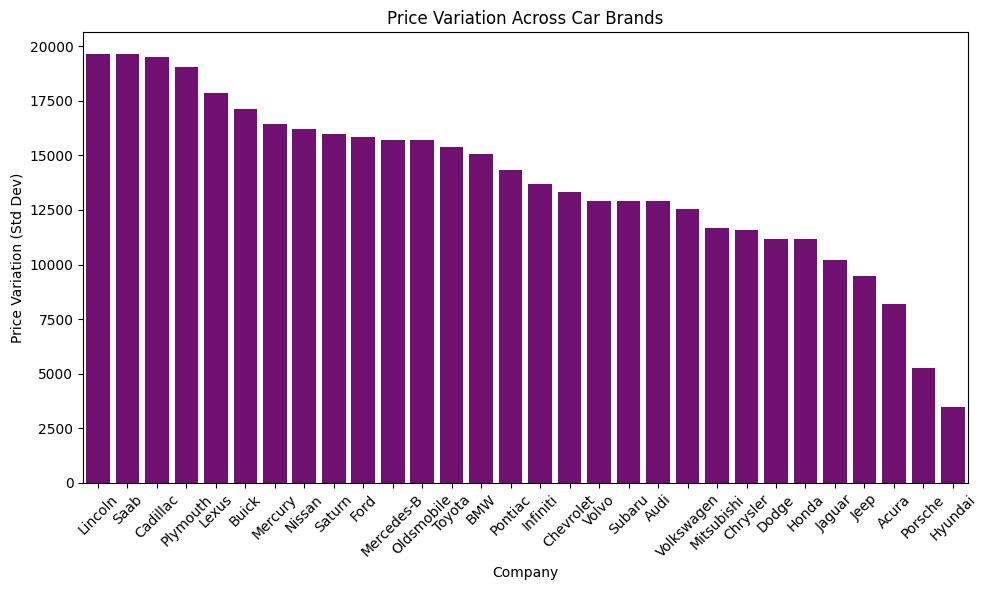

In [31]:
df1['Price ($)'] = pd.to_numeric(df1['Price ($)'], errors='coerce')

variation = df1.groupby('Company')["Price ($)"].std().sort_values(ascending=False)
print("Price variation by Company:\n", variation)

highest_var_brand = variation.idxmax()
highest_var_value = variation.max()
print(f"\nCompany with highest price variation: {highest_var_brand}")
print(f"Variation value: {highest_var_value}")

plt.figure(figsize=(10,6))
sns.barplot(x=variation.index, y=variation.values, color = "purple")
plt.xticks(rotation=45)
plt.xlabel("Company")
plt.ylabel("Price Variation (Std Dev)")
plt.title("Price Variation Across Car Brands")
plt.tight_layout()
plt.show()

# 3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare.

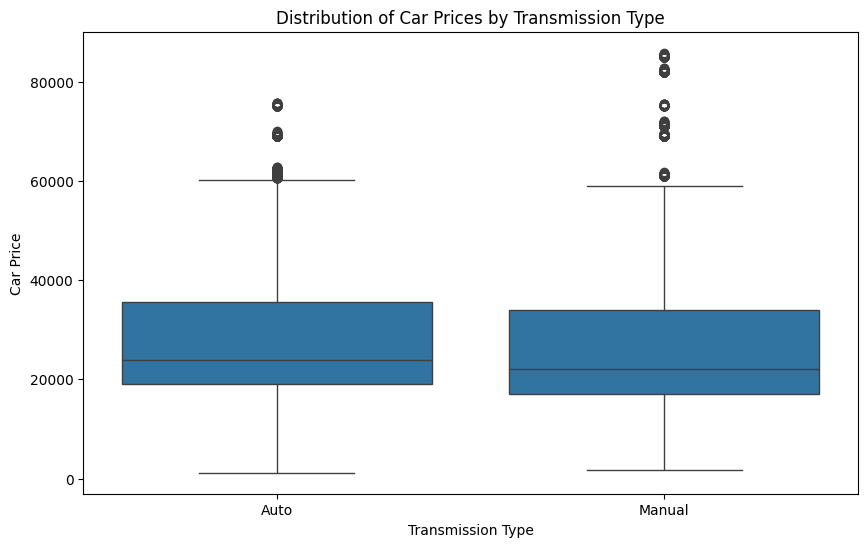

                   Q1       Q3      IQR
Transmission                           
Auto          19000.0  35500.0  16500.0
Manual        17000.0  34000.0  17000.0


In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x="Transmission", y="Price ($)")
plt.title("Distribution of Car Prices by Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Car Price")
plt.show()

iqr_data = (
    df1.groupby("Transmission")["Price ($)"]
    .quantile([0.25, 0.75])
    .unstack()
    .rename(columns={0.25: "Q1", 0.75: "Q3"})
)

iqr_data["IQR"] = iqr_data["Q3"] - iqr_data["Q1"]
print(iqr_data)

# 4. What is the distribution of car prices across different regions.

In [33]:
df1.dtypes

Car_id           object
Date             object
Customer Name    object
Gender           object
Annual Income     int64
Dealer_Name      object
Company          object
Model            object
Engine           object
Transmission     object
Color            object
Price ($)         int64
Dealer_No        object
Body Style       object
Phone             int64
Dealer_Region    object
dtype: object

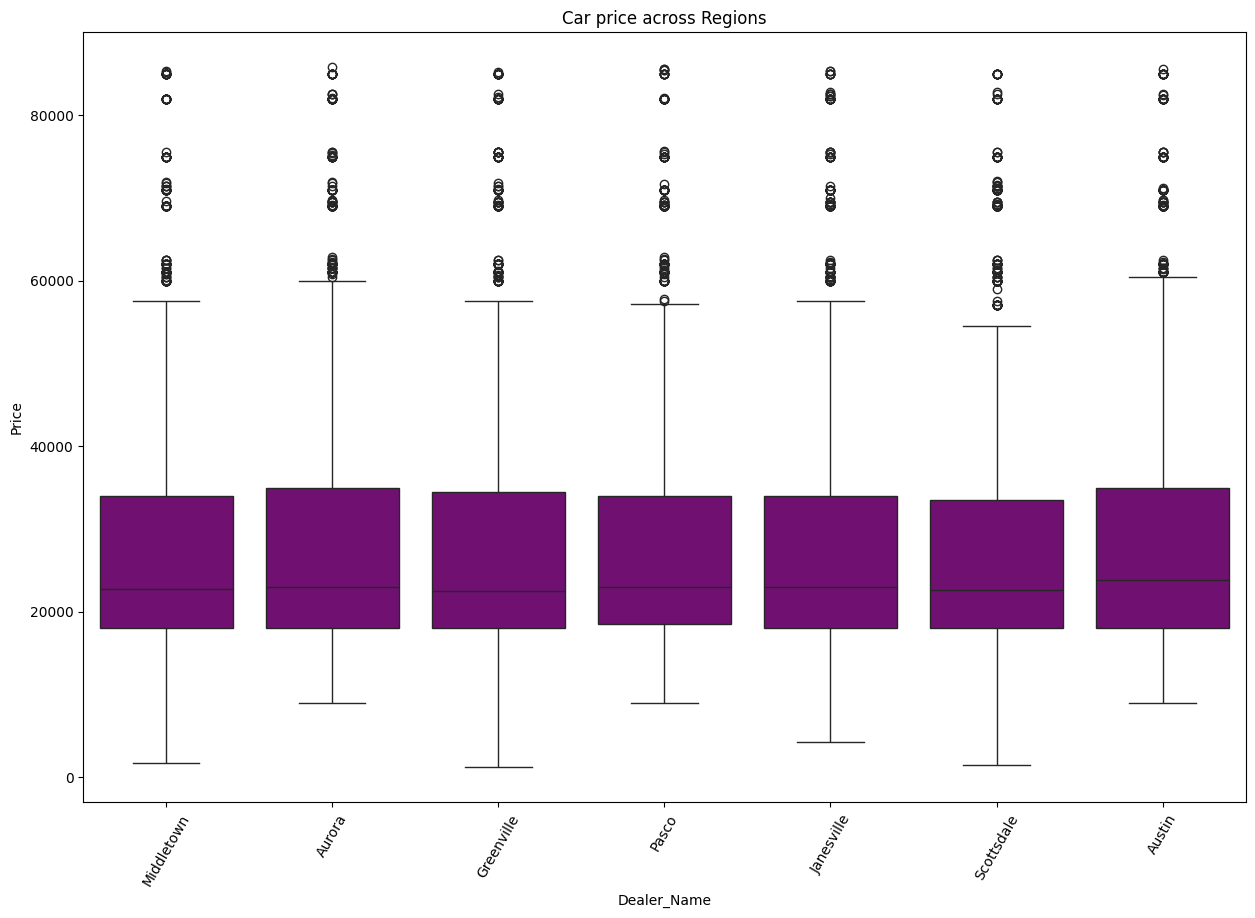

In [34]:
plt.figure(figsize = (15, 10))
sns.boxplot(x = "Dealer_Region", y = "Price ($)", data = df1, color = "purple")
plt.title("Car price across Regions")
plt.xlabel("Dealer_Name")
plt.ylabel("Price")
plt.xticks(rotation = 60)
plt.show()

# 5. What is the distribution of cars based on body styles.

In [35]:
df1

Car_id        Date Customer Name  Gender  Annual Income  \
0      C_CND_000001    1/2/2022     Geraldine    Male          13500   
1      C_CND_000002    1/2/2022           Gia    Male        1480000   
2      C_CND_000003    1/2/2022        Gianna    Male        1035000   
3      C_CND_000004    1/2/2022       Giselle    Male          13500   
4      C_CND_000005    1/2/2022         Grace    Male        1465000   
...             ...         ...           ...     ...            ...   
23901  C_CND_023902  12/31/2023        Martin    Male          13500   
23902  C_CND_023903  12/31/2023         Jimmy  Female         900000   
23903  C_CND_023904  12/31/2023          Emma    Male         705000   
23904  C_CND_023905  12/31/2023      Victoire    Male          13500   
23905  C_CND_023906  12/31/2023       Donovan    Male        1225000   

                               Dealer_Name    Company       Model  \
0      Buddy Storbeck's Diesel Service Inc       Ford  Expedition   
1                         C & M Motors Inc      Dodge     Durango   
2                              Capitol KIA   Cadillac    Eldorado   
3                   Chrysler of Tri-Cities     Toyota      Celica   
4                        Chrysler Plymouth      Acura          TL   
...                                    ...        ...         ...   
23901                     C & M Motors Inc   Plymouth     Voyager   
23902       Ryder Truck Rental and Leasing  Chevrolet       Prizm   
23903               Chrysler of Tri-Cities        BMW        328i   
23904                    Chrysler Plymouth  Chevrolet       Metro   
23905                      Pars Auto Sales      Lexus       ES300   

                          Engine Transmission       Color  Price ($)  \
0      DoubleÂ Overhead Camshaft         Auto       Black      26000   
1      DoubleÂ Overhead Camshaft         Auto       Black      19000   
2              Overhead Camshaft       Manual         Red      31500   
3              Overhead Camshaft       Manual  Pale White      14000   
4      DoubleÂ Overhead Camshaft         Auto         Red      24500   
...                          ...          ...         ...        ...   
23901          Overhead Camshaft       Manual         Red      12000   
23902  DoubleÂ Overhead Camshaft         Auto       Black      16000   
23903          Overhead Camshaft       Manual         Red      21000   
23904  DoubleÂ Overhead Camshaft         Auto       Black      31000   
23905  DoubleÂ Overhead Camshaft         Auto  Pale White      27500   

       Dealer_No  Body Style    Phone Dealer_Region  
0      06457-3834        SUV  8264678    Middletown  
1      60504-7114        SUV  6848189        Aurora  
2      38701-8047  Passenger  7298798    Greenville  
3      99301-3882        SUV  6257557         Pasco  
4      53546-9427  Hatchback  7081483    Janesville  
...           ...        ...      ...           ...  
23901  60504-7114  Passenger  8583598         Pasco  
23902  06457-3834    Hardtop  7914229    Middletown  
23903  99301-3882      Sedan  7659127    Scottsdale  
23904  53546-9427  Passenger  6030764        Austin  
23905  38701-8047    Hardtop  7020564    Middletown  

[23906 rows x 16 columns]

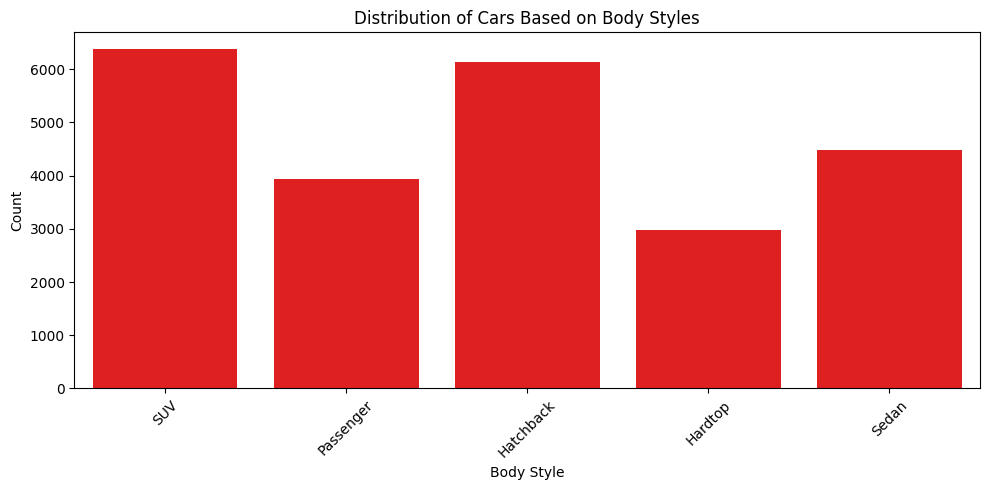

In [36]:
plt.figure(figsize = (10,5))
sns.countplot(data = df1, x = "Body Style", color = "red")
plt.title("Distribution of Cars Based on Body Styles")
plt.xlabel("Body Style")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

# 6. How does the average selling price of cars vary by customer gender and annual income.

      Gender  Annual Income     Price ($)
0     Female          13500  28132.038732
1     Female         106000  46001.000000
2     Female         121000  20000.000000
3     Female         190000  19001.000000
4     Female         211000  51000.000000
...      ...            ...           ...
3437    Male        6600000  39000.000000
3438    Male        6800000  15000.000000
3439    Male        7650000  21000.000000
3440    Male        8000000  85000.000000
3441    Male       11200000  26001.000000

[3442 rows x 3 columns]


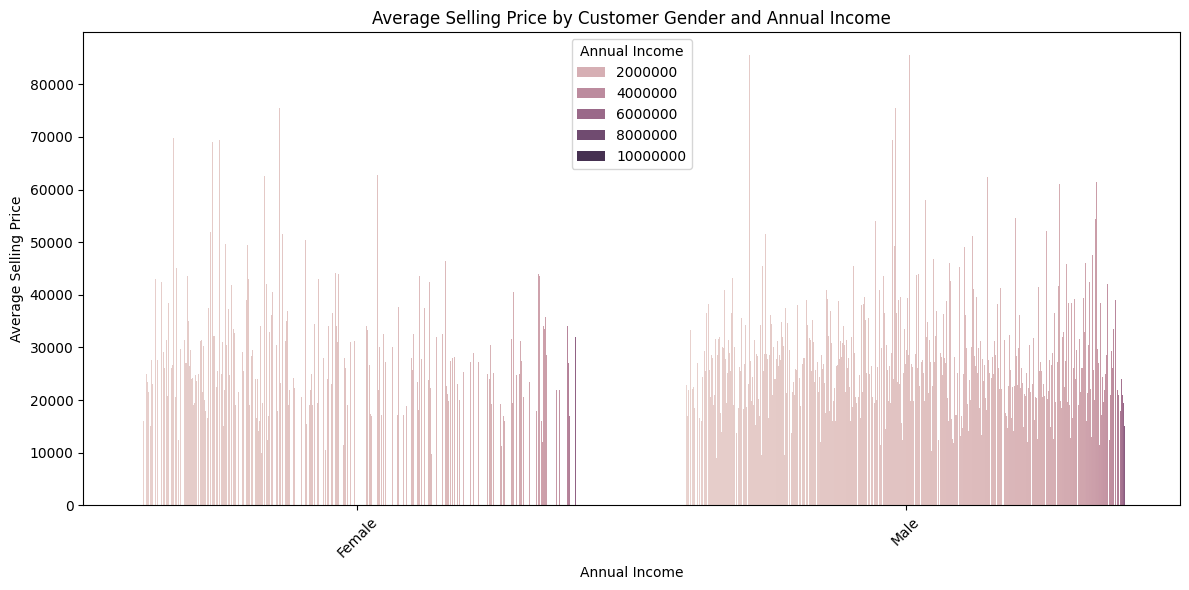

In [37]:
avg_price = df1.groupby(['Gender', 'Annual Income'])['Price ($)'].mean().reset_index()
print(avg_price)

plt.figure(figsize=(12,6))
sns.barplot(
    data=avg_price, 
    x='Gender', 
    y='Price ($)', 
    hue='Annual Income'
)

plt.title("Average Selling Price by Customer Gender and Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Average Selling Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. What is the distribution of car prices by region, and how does the number of cars sold vary by region.

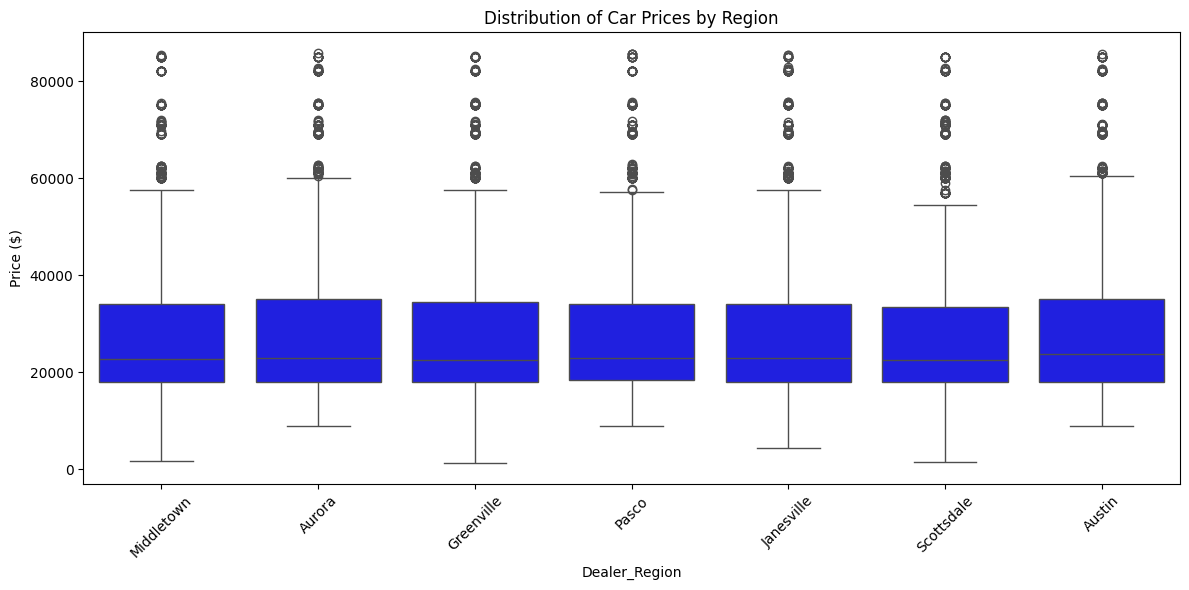

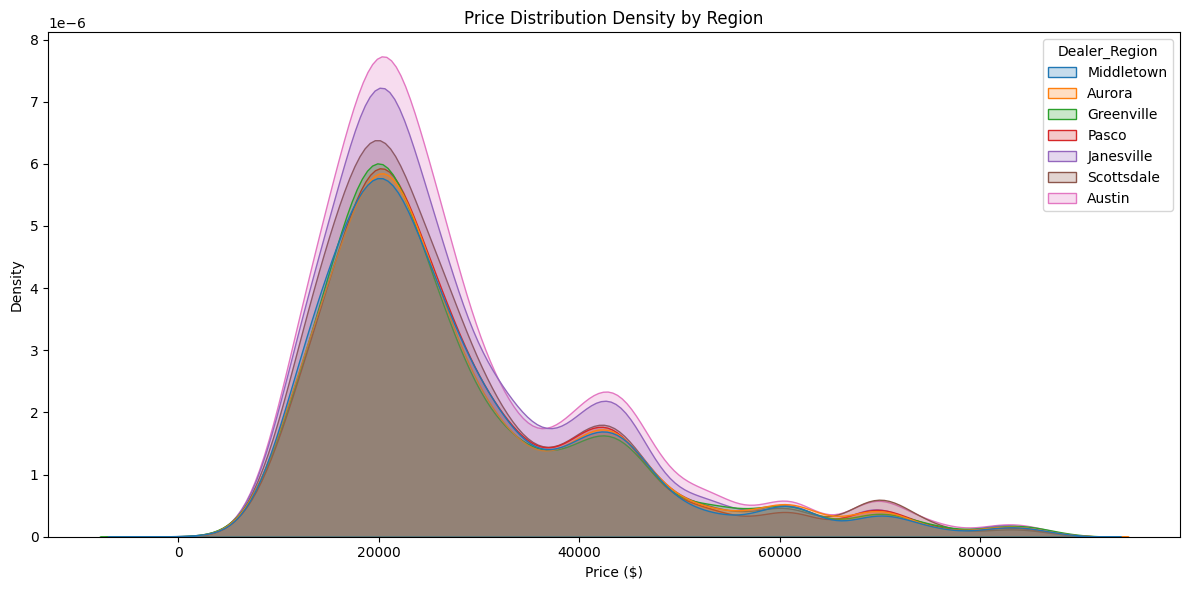

Number of cars sold by region:
 Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Greenville    3128
Middletown    3128
Name: count, dtype: int64


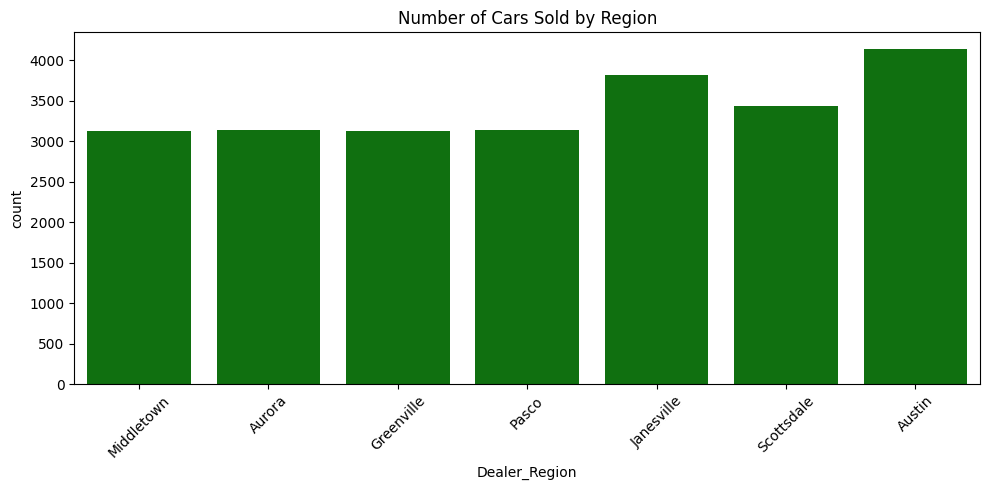

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df1, color = "blue")
plt.title('Distribution of Car Prices by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.kdeplot(data=df1, x='Price ($)', hue='Dealer_Region', fill=True)
plt.title('Price Distribution Density by Region')
plt.tight_layout()
plt.show()

region_counts = df1['Dealer_Region'].value_counts()
print("Number of cars sold by region:\n", region_counts)

plt.figure(figsize=(10, 5))
sns.countplot(x='Dealer_Region', data=df1, color = "green")
plt.title('Number of Cars Sold by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 8. How does the average car price differ between cars with different engine sizes.

In [39]:
df1

Car_id        Date Customer Name  Gender  Annual Income  \
0      C_CND_000001    1/2/2022     Geraldine    Male          13500   
1      C_CND_000002    1/2/2022           Gia    Male        1480000   
2      C_CND_000003    1/2/2022        Gianna    Male        1035000   
3      C_CND_000004    1/2/2022       Giselle    Male          13500   
4      C_CND_000005    1/2/2022         Grace    Male        1465000   
...             ...         ...           ...     ...            ...   
23901  C_CND_023902  12/31/2023        Martin    Male          13500   
23902  C_CND_023903  12/31/2023         Jimmy  Female         900000   
23903  C_CND_023904  12/31/2023          Emma    Male         705000   
23904  C_CND_023905  12/31/2023      Victoire    Male          13500   
23905  C_CND_023906  12/31/2023       Donovan    Male        1225000   

                               Dealer_Name    Company       Model  \
0      Buddy Storbeck's Diesel Service Inc       Ford  Expedition   
1                         C & M Motors Inc      Dodge     Durango   
2                              Capitol KIA   Cadillac    Eldorado   
3                   Chrysler of Tri-Cities     Toyota      Celica   
4                        Chrysler Plymouth      Acura          TL   
...                                    ...        ...         ...   
23901                     C & M Motors Inc   Plymouth     Voyager   
23902       Ryder Truck Rental and Leasing  Chevrolet       Prizm   
23903               Chrysler of Tri-Cities        BMW        328i   
23904                    Chrysler Plymouth  Chevrolet       Metro   
23905                      Pars Auto Sales      Lexus       ES300   

                          Engine Transmission       Color  Price ($)  \
0      DoubleÂ Overhead Camshaft         Auto       Black      26000   
1      DoubleÂ Overhead Camshaft         Auto       Black      19000   
2              Overhead Camshaft       Manual         Red      31500   
3              Overhead Camshaft       Manual  Pale White      14000   
4      DoubleÂ Overhead Camshaft         Auto         Red      24500   
...                          ...          ...         ...        ...   
23901          Overhead Camshaft       Manual         Red      12000   
23902  DoubleÂ Overhead Camshaft         Auto       Black      16000   
23903          Overhead Camshaft       Manual         Red      21000   
23904  DoubleÂ Overhead Camshaft         Auto       Black      31000   
23905  DoubleÂ Overhead Camshaft         Auto  Pale White      27500   

       Dealer_No  Body Style    Phone Dealer_Region  
0      06457-3834        SUV  8264678    Middletown  
1      60504-7114        SUV  6848189        Aurora  
2      38701-8047  Passenger  7298798    Greenville  
3      99301-3882        SUV  6257557         Pasco  
4      53546-9427  Hatchback  7081483    Janesville  
...           ...        ...      ...           ...  
23901  60504-7114  Passenger  8583598         Pasco  
23902  06457-3834    Hardtop  7914229    Middletown  
23903  99301-3882      Sedan  7659127    Scottsdale  
23904  53546-9427  Passenger  6030764        Austin  
23905  38701-8047    Hardtop  7020564    Middletown  

[23906 rows x 16 columns]

In [40]:
avg = df1.groupby("Engine")["Price ($)"].mean().reset_index()

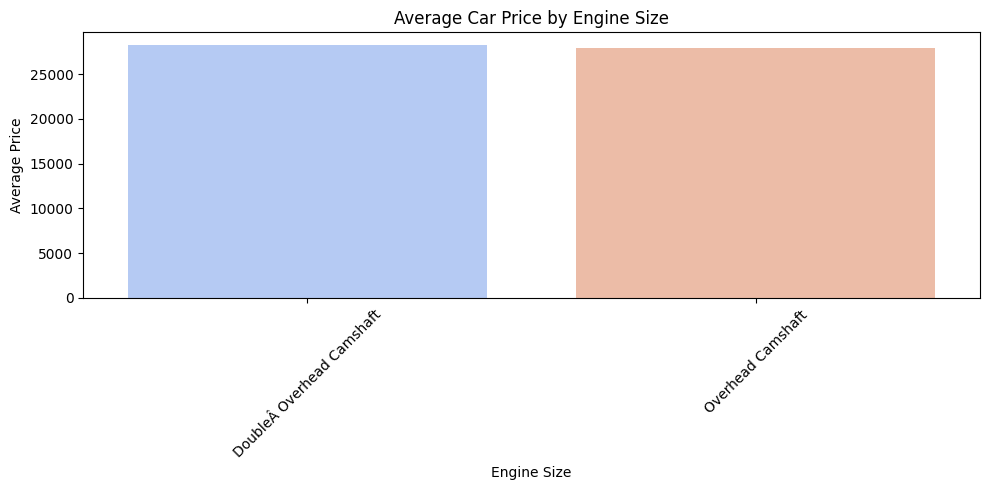

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(x = "Engine", y = 'Price ($)', data = avg, palette  = "coolwarm")
plt.xticks(rotation=45)
plt.title("Average Car Price by Engine Size")
plt.xlabel("Engine Size")
plt.ylabel("Average Price")
plt.tight_layout()
plt.show()

# 9. How do car prices vary based on the customer’s annual income bracket.

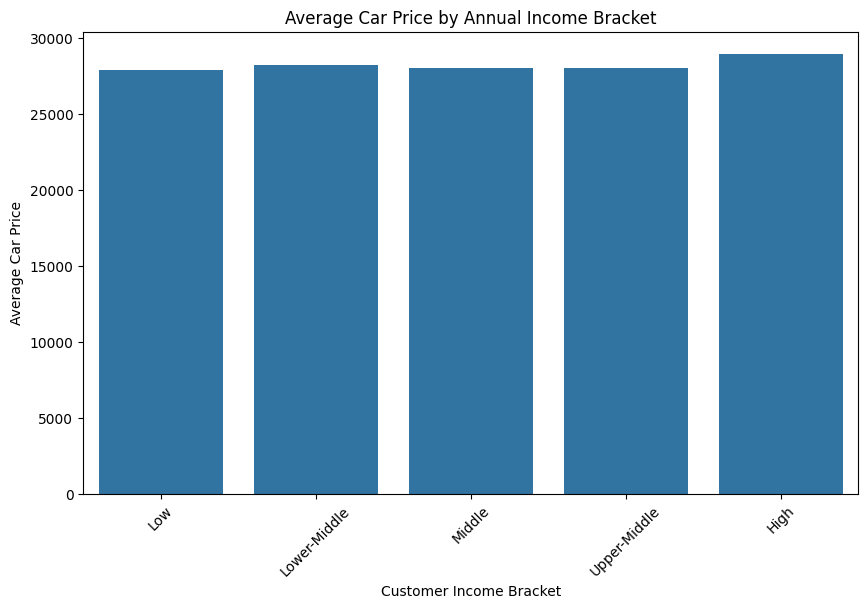

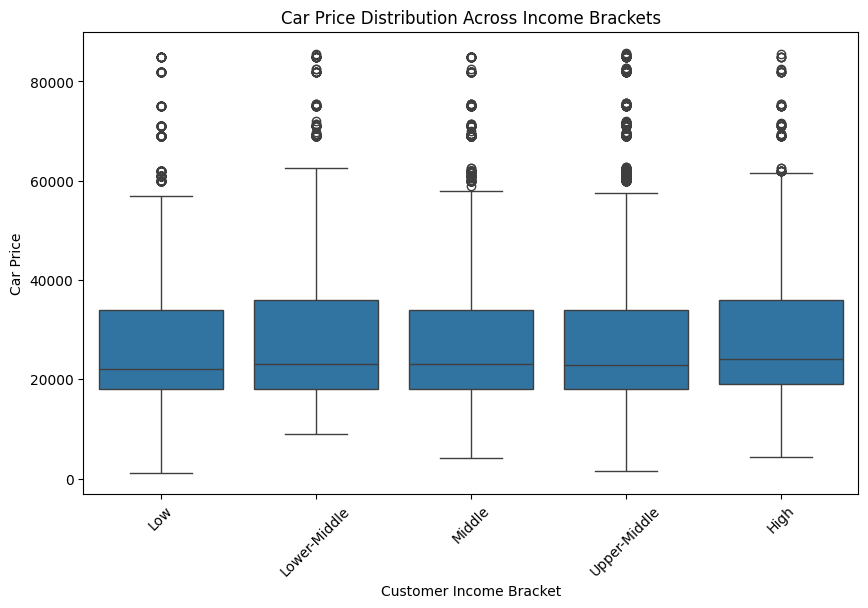

In [42]:
bins = [0, 300000, 600000, 1000000, 2000000, df1['Annual Income'].max()]
labels = ['Low', 'Lower-Middle', 'Middle', 'Upper-Middle', 'High']

df1['IncomeBracket'] = pd.cut(df1['Annual Income'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=df1, x='IncomeBracket', y='Price ($)', estimator='mean', ci=None)
plt.title('Average Car Price by Annual Income Bracket')
plt.xlabel('Customer Income Bracket')
plt.ylabel('Average Car Price')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='IncomeBracket', y='Price ($)')
plt.title('Car Price Distribution Across Income Brackets')
plt.xlabel('Customer Income Bracket')
plt.ylabel('Car Price')
plt.xticks(rotation=45)
plt.show()


# 10. What are the top 5 car models with the highest number of sales, and how does their price distribution look.

Top 5 car models with highest sales:
Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


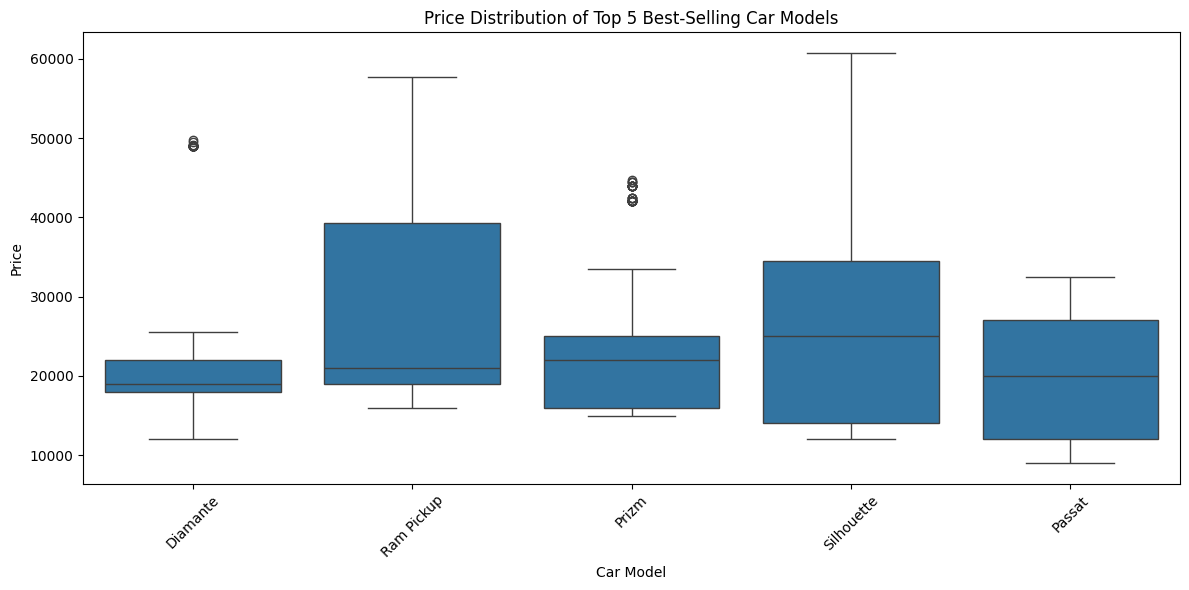

In [43]:
top5_models = (
    df1['Model']
    .value_counts()
    .head(5)
    .index
)

print("Top 5 car models with highest sales:")
print(df1['Model'].value_counts().head(5))

df1_top5 = df1[df1['Model'].isin(top5_models)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df1_top5, x='Model', y='Price ($)')
plt.title("Price Distribution of Top 5 Best-Selling Car Models")
plt.xlabel("Car Model")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 11.  How does car price vary with engine size across different car colors, and which colors have the highest price variation.

In [44]:
df1.head(1)

Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   

                           Dealer_Name Company       Model  \
0  Buddy Storbeck's Diesel Service Inc    Ford  Expedition   

                      Engine Transmission  Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto  Black      26000  06457-3834   

  Body Style    Phone Dealer_Region IncomeBracket  
0        SUV  8264678    Middletown           Low

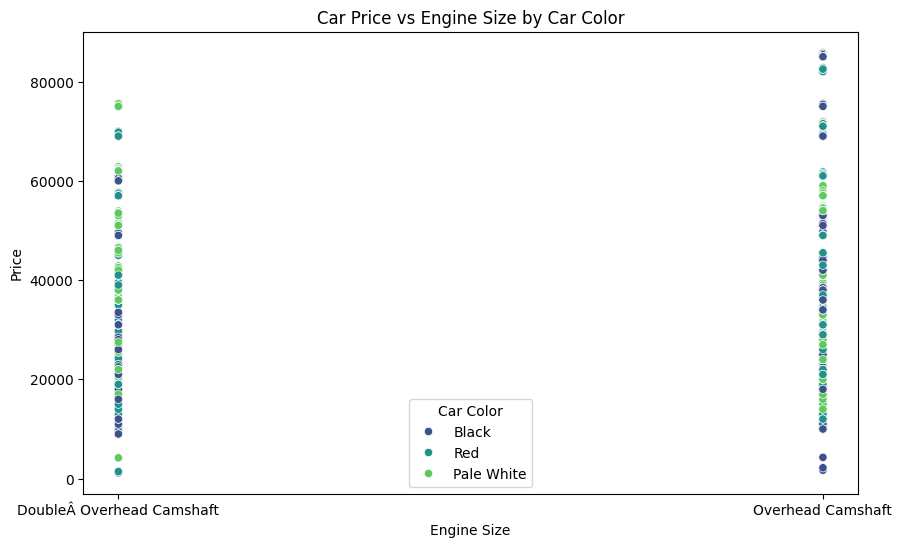


Price Variation (Std Dev) by Car Color:

Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


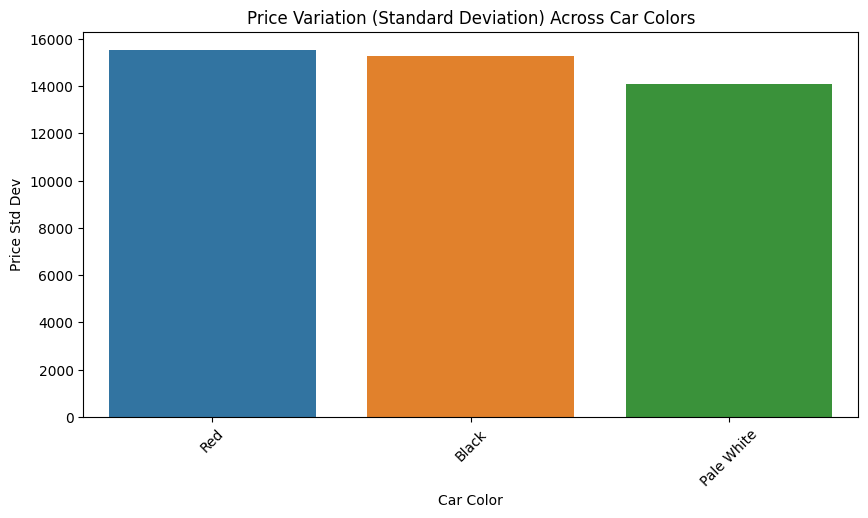


Color with the highest price variation: Red (15519.36)


In [45]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df1, x="Engine", y="Price ($)", hue="Color", palette="viridis")
plt.title("Car Price vs Engine Size by Car Color")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.legend(title="Car Color")
plt.show()

variation = df1.groupby("Color")["Price ($)"].std().sort_values(ascending=False)
print("\nPrice Variation (Std Dev) by Car Color:\n")
print(variation)

plt.figure(figsize=(10,5))
sns.barplot(x=variation.index, y=variation.values, palette="tab10")
plt.title("Price Variation (Standard Deviation) Across Car Colors")
plt.ylabel("Price Std Dev")
plt.xlabel("Car Color")
plt.xticks(rotation=45)
plt.show()

highest_var_color = variation.idxmax()
highest_var_value = variation.max()

print(f"\nColor with the highest price variation: {highest_var_color} ({highest_var_value:.2f})")

# 12. Is there any seasonal trend in car sales based on the date of sale.

Using 'Price ($)' as price column for revenue analysis.


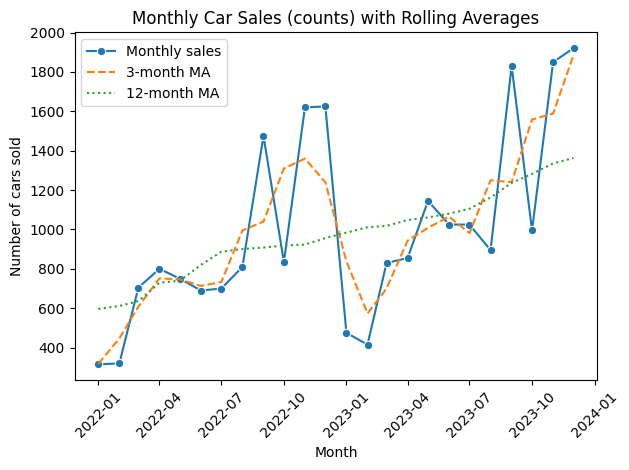

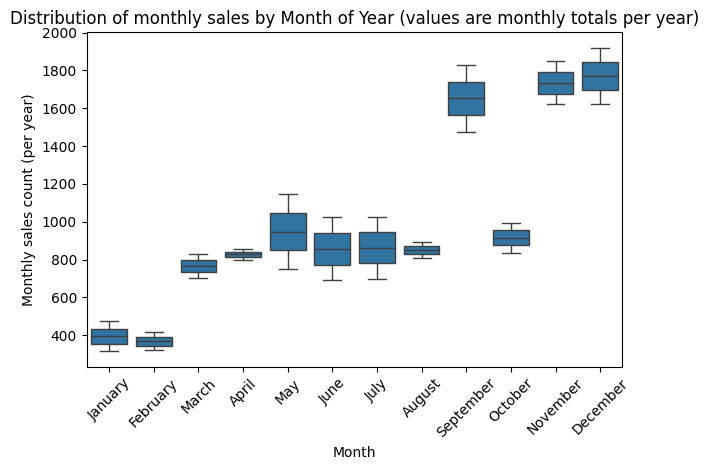

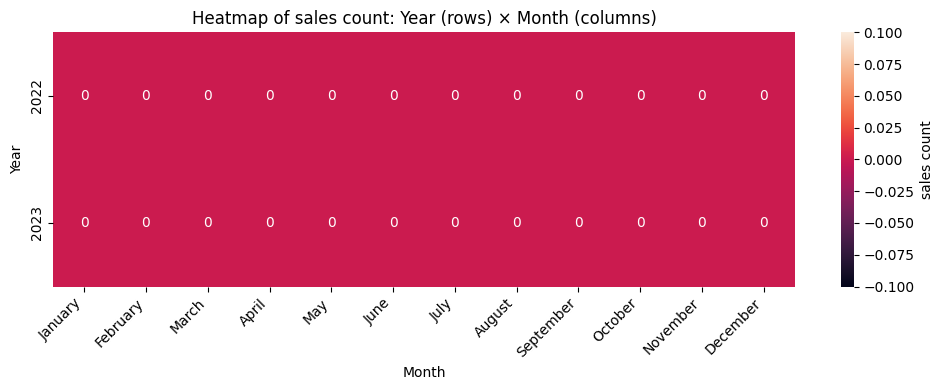

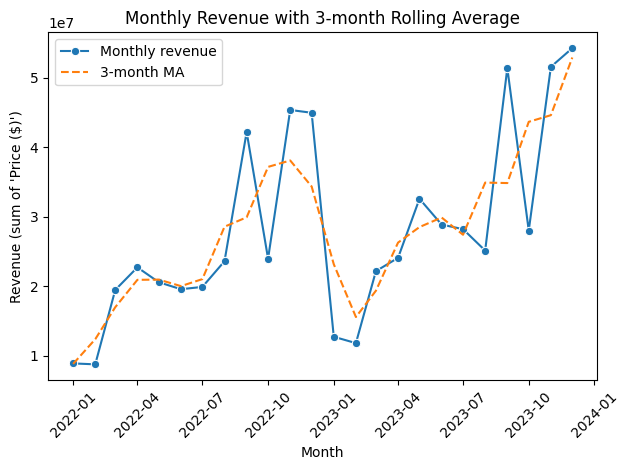

In [46]:
df1["Date"] = pd.to_datetime(df1["Date"], errors="coerce")
df1 = df1.dropna(subset=["Date"]).copy()

df1["year"] = df1["Date"].dt.year
df1["month"] = df1["Date"].dt.month
df1["month_name"] = df1["Date"].dt.month_name()
df1["year_month"] = df1["Date"].dt.to_period("M").dt.to_timestamp()

monthly_counts = (
    df1.groupby("year_month")
      .size()
      .rename("sales_count")
      .reset_index()
)

monthly_counts["roll_3"] = monthly_counts["sales_count"].rolling(3, center=True, min_periods=1).mean()
monthly_counts["roll_12"] = monthly_counts["sales_count"].rolling(12, center=True, min_periods=1).mean()

price_candidates = [c for c in df1.columns if any(k in c.lower() for k in ("price", "amount", "sale_price", "ex_showroom"))]
has_price = len(price_candidates) > 0
if has_price:
    price_col = price_candidates[0]
    print(f"Using '{price_col}' as price column for revenue analysis.")
    df1[price_col] = (pd.to_numeric(df1[price_col].astype(str).str.replace(r"[^\d.-]", "", regex=True), errors="coerce"))
    revenue_monthly = df1.groupby("year_month")[price_col].sum().reset_index().rename(columns={price_col: "monthly_revenue"})
    revenue_monthly["roll_3"] = revenue_monthly["monthly_revenue"].rolling(3, center=True, min_periods=1).mean()

plt.figure()
ax = sns.lineplot(data=monthly_counts, x="year_month", y="sales_count", marker="o", label="Monthly sales")
sns.lineplot(data=monthly_counts, x="year_month", y="roll_3", label="3-month MA", linestyle="--")
sns.lineplot(data=monthly_counts, x="year_month", y="roll_12", label="12-month MA", linestyle=":")
ax.set_title("Monthly Car Sales (counts) with Rolling Averages")
ax.set_xlabel("Month")
ax.set_ylabel("Number of cars sold")
ax.tick_params(axis="x", rotation=45)
ax.legend()
plt.tight_layout()
plt.show()

ym_counts = df1.groupby(["year", "month"])["Date"].count().reset_index(name="count")
ym_counts["month_name"] = pd.to_datetime(ym_counts["month"], format="%m").dt.month_name()
month_order = ["January","February","March","April","May","June","July","August","September","October","November","December"]

plt.figure()
ax = sns.boxplot(data=ym_counts, x="month_name", y="count", order=month_order)
ax.set_title("Distribution of monthly sales by Month of Year (values are monthly totals per year)")
ax.set_xlabel("Month")
ax.set_ylabel("Monthly sales count (per year)")
ax.tick_params(axis="x", rotation=45)
plt.tight_layout()
plt.show()

pivot = df1.groupby(["year", "month"]).size().unstack(fill_value=0)
pivot = pivot.reindex(columns = df1[1:13], fill_value=0)

plt.figure(figsize=(10, max(4, 0.6 * pivot.shape[0])))
ax = sns.heatmap(pivot, annot=True, fmt="d", cbar_kws={"label": "sales count"})
ax.set_title("Heatmap of sales count: Year (rows) × Month (columns)")
ax.set_xlabel("Month")
ax.set_ylabel("Year")
# set month tick labels
ax.set_xticklabels(month_order, rotation=45, ha='right')
plt.tight_layout()
plt.show()

if has_price:
    plt.figure()
    ax = sns.lineplot(data=revenue_monthly, x="year_month", y="monthly_revenue", marker="o", label="Monthly revenue")
    sns.lineplot(data=revenue_monthly, x="year_month", y="roll_3", label="3-month MA", linestyle="--")
    ax.set_title("Monthly Revenue with 3-month Rolling Average")
    ax.set_xlabel("Month")
    ax.set_ylabel("Revenue (sum of '{}')".format(price_col))
    ax.tick_params(axis="x", rotation=45)
    ax.legend()
    plt.tight_layout()
    plt.show()

# 13. How does the car price distribution change when considering different combinations of body style and transmission type.

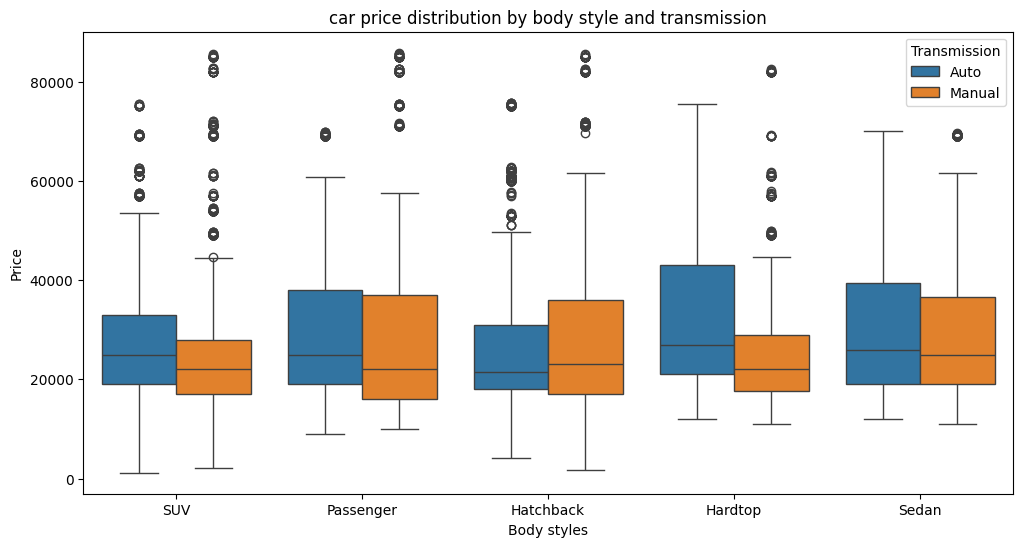

In [47]:
grouped = df1.groupby(["Body Style", "Transmission"])["Price ($)"].mean().reset_index()
pivot = grouped.pivot(index = "Body Style", columns = "Transmission", values = "Price ($)")

plt.figure(figsize = (12,6))
sns.boxplot(x = "Body Style", y = "Price ($)", hue = "Transmission", data = df1)
plt.title("car price distribution by body style and transmission")
plt.xlabel("Body styles")
plt.ylabel("Price")
plt.show()

# 14.  What is the correlation between car price, engine size, and annual income of customers, and how do these features interact.

In [48]:
df1_copy = df1[["Price ($)", 'Engine', "Annual Income"]].copy()
df1_copy

Price ($)                     Engine  Annual Income
0          26000  DoubleÂ Overhead Camshaft          13500
1          19000  DoubleÂ Overhead Camshaft        1480000
2          31500          Overhead Camshaft        1035000
3          14000          Overhead Camshaft          13500
4          24500  DoubleÂ Overhead Camshaft        1465000
...          ...                        ...            ...
23901      12000          Overhead Camshaft          13500
23902      16000  DoubleÂ Overhead Camshaft         900000
23903      21000          Overhead Camshaft         705000
23904      31000  DoubleÂ Overhead Camshaft          13500
23905      27500  DoubleÂ Overhead Camshaft        1225000

[23906 rows x 3 columns]

In [50]:
df1_copy["Engine"].unique()

array(['DoubleÂ\xa0Overhead Camshaft', 'Overhead Camshaft'], dtype=object)

In [51]:
df1_copy["Engine"] = df1_copy["Engine"].str.replace("DoubleÂ\xa0", "Double")

In [52]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

encoded = encoder.fit_transform(df1_copy[["Engine"]]).toarray()

In [53]:
encoder_df = pd.DataFrame(encoded, columns = encoder.get_feature_names_out())

In [54]:
df1_copy = pd.concat([df1_copy, encoder_df], axis = 1)

In [55]:
df1_copy.drop("Engine", axis = 1, inplace = True)

In [56]:
df1_copy["Engine_DoubleOverhead Camshaft"].astype(float)

0        1.0
1        1.0
2        0.0
3        0.0
4        1.0
        ... 
23901    0.0
23902    1.0
23903    0.0
23904    1.0
23905    1.0
Name: Engine_DoubleOverhead Camshaft, Length: 23906, dtype: float64

In [57]:
df1_copy["Engine_Overhead Camshaft"].astype(float)

0        0.0
1        0.0
2        1.0
3        1.0
4        0.0
        ... 
23901    1.0
23902    0.0
23903    1.0
23904    0.0
23905    0.0
Name: Engine_Overhead Camshaft, Length: 23906, dtype: float64

In [58]:
corr = df1_copy.corr()

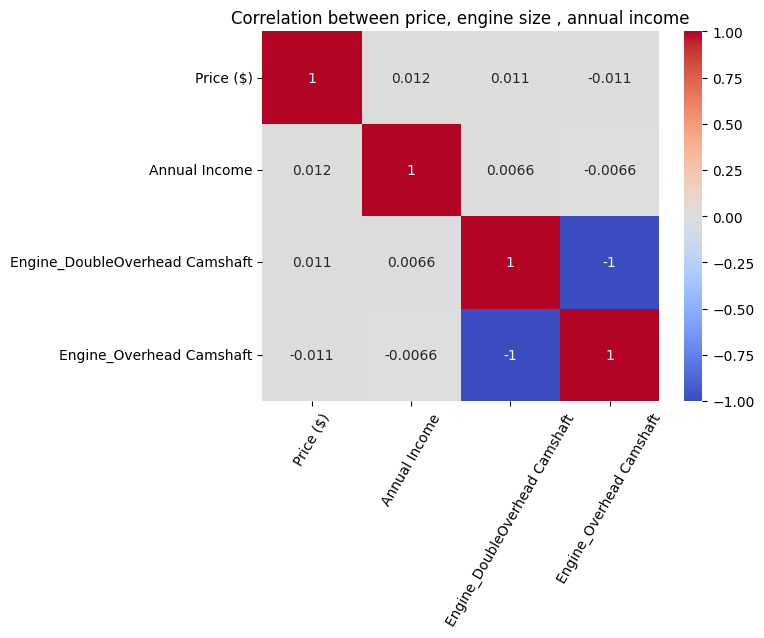

In [59]:
sns.heatmap(corr, cmap = "coolwarm", annot = True)
plt.title("Correlation between price, engine size , annual income")
plt.xticks(rotation = 60)
plt.show()

# 15.  How does the average car price vary across different car models and engine types.


Average Car Price by Model and Engine Type:
        Model                     Engine     Price ($)
0       3-Sep  DoubleÂ Overhead Camshaft  37986.380117
1      3000GT  DoubleÂ Overhead Camshaft  22764.326923
2      3000GT          Overhead Camshaft  21770.659864
3        300M  DoubleÂ Overhead Camshaft  21394.888889
4        323i  DoubleÂ Overhead Camshaft  16744.632287
..        ...                        ...           ...
256  Windstar          Overhead Camshaft  17100.272727
257  Wrangler  DoubleÂ Overhead Camshaft  21145.294737
258  Wrangler          Overhead Camshaft  18742.942029
259    Xterra  DoubleÂ Overhead Camshaft  15940.459459
260    Xterra          Overhead Camshaft  31072.500000

[261 rows x 3 columns]


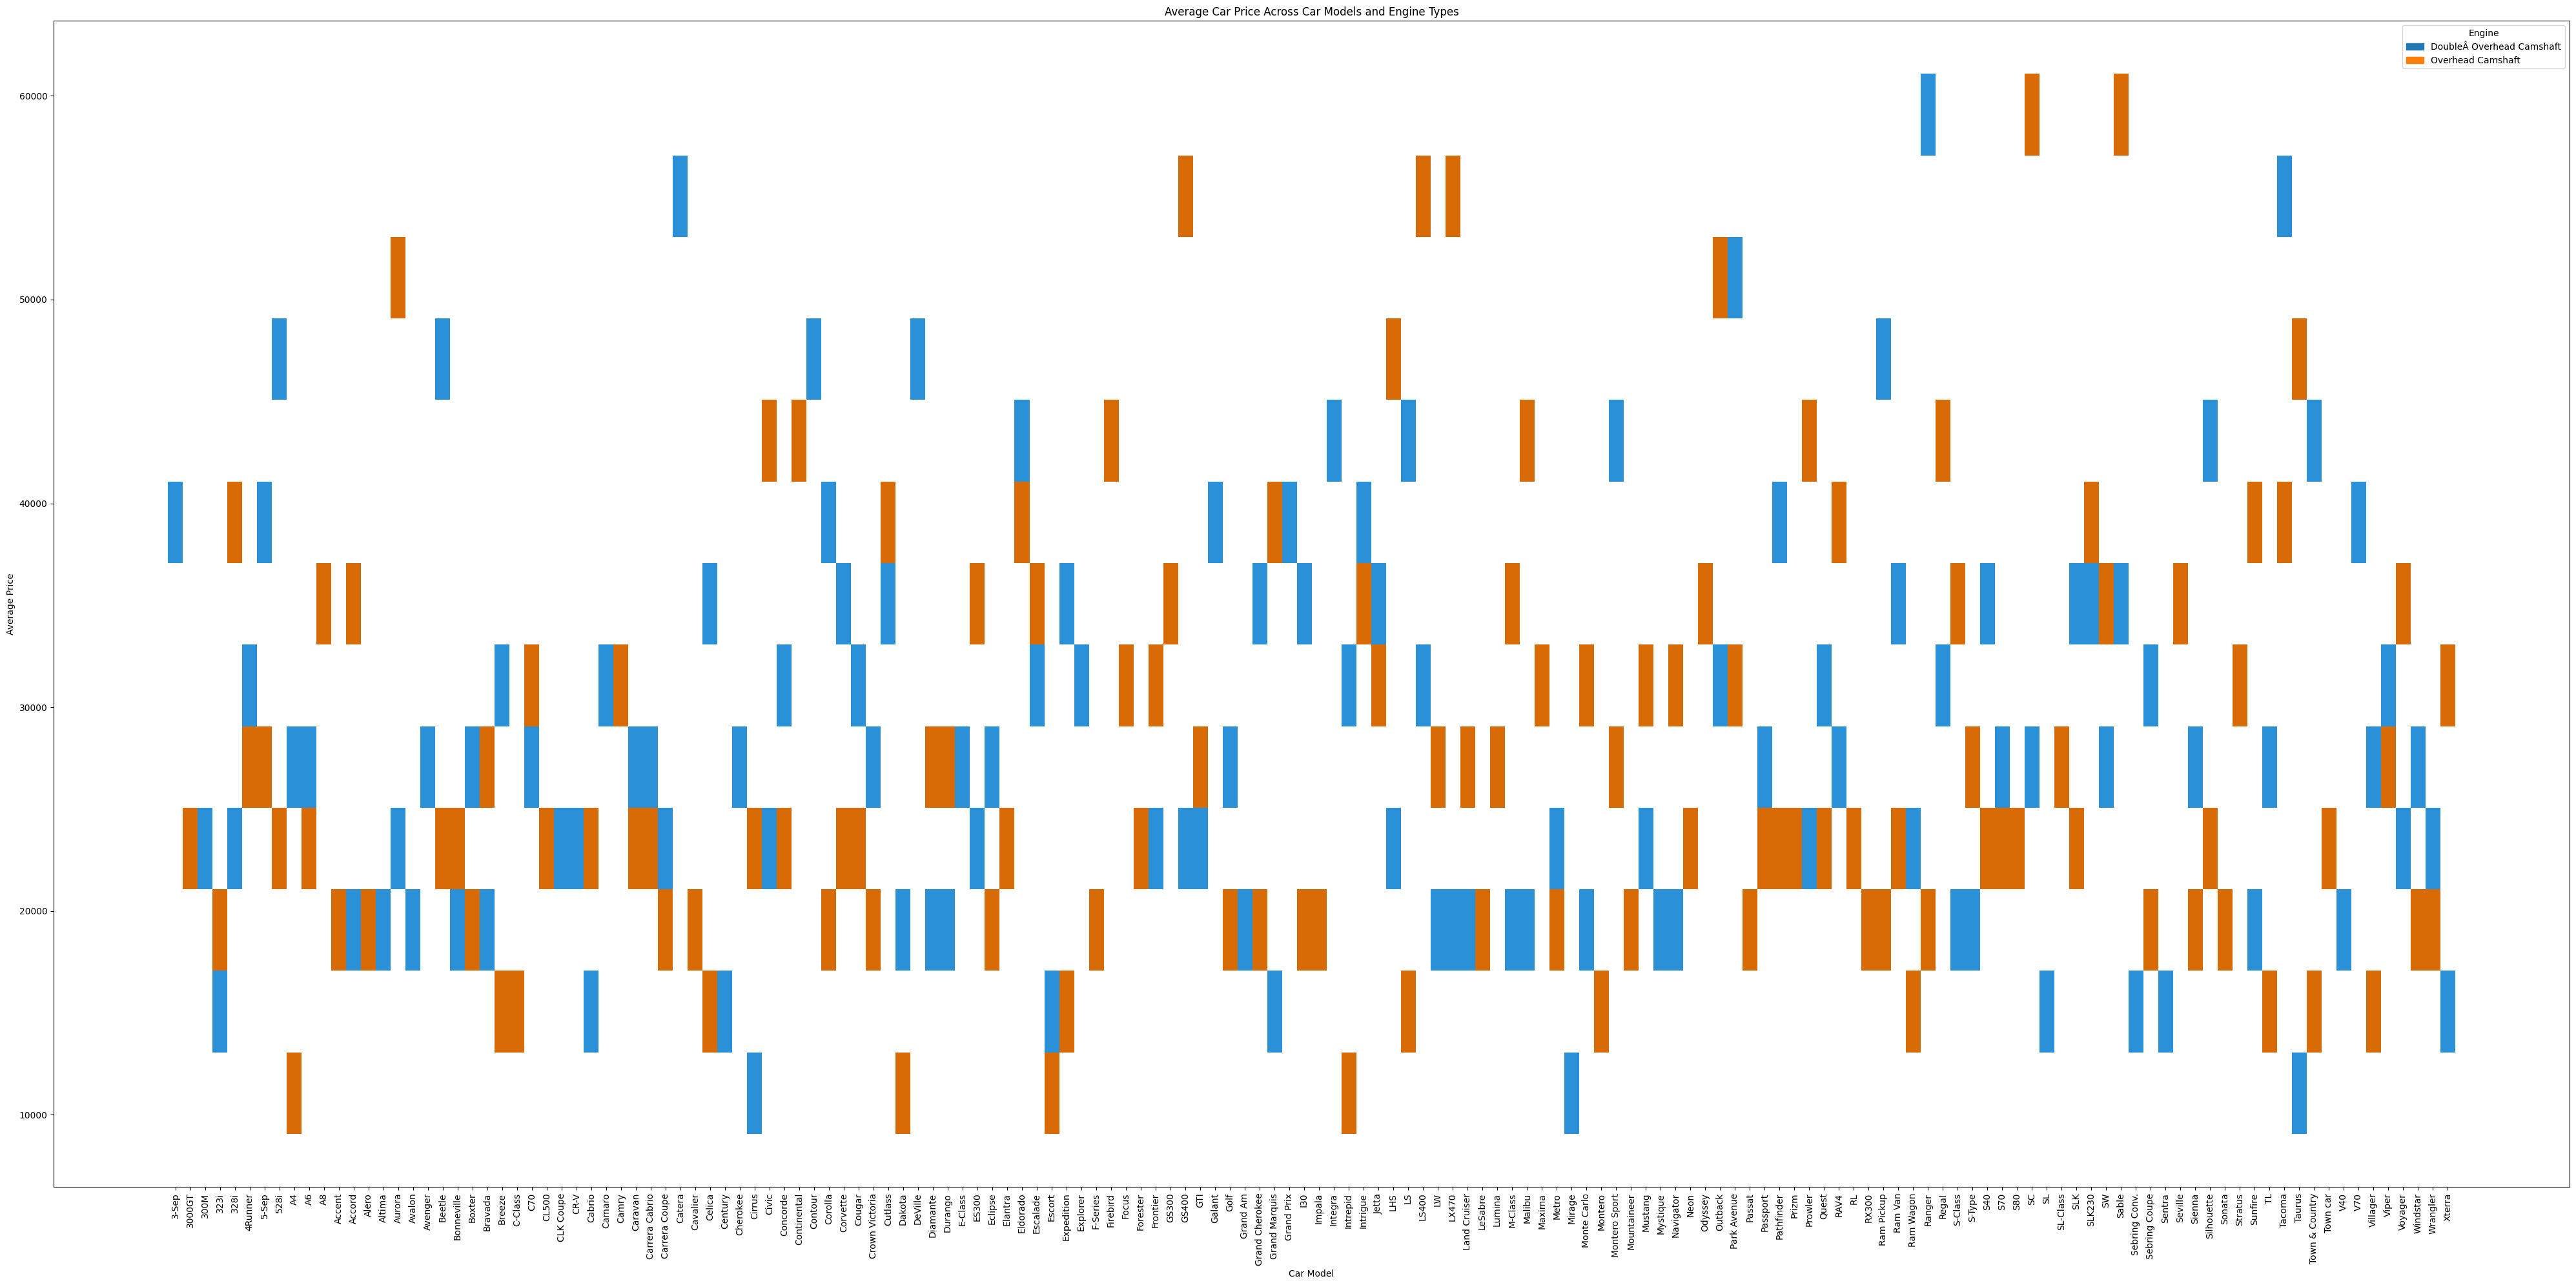

In [88]:
avg_price = df1.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

print("\nAverage Car Price by Model and Engine Type:")
print(avg_price)

plt.figure(figsize=(40,20))
sns.histplot(data=avg_price, x='Model', y='Price ($)', hue='Engine')

plt.title("Average Car Price Across Car Models and Engine Types")
plt.xticks(rotation=90)
plt.ylabel("Average Price")
plt.xlabel("Car Model")
plt.tight_layout()
plt.show()


# EDA 3.

In [4]:
df2 = pd.read_csv("amazon.csv")

In [5]:
df2

product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category discounted_price  \
0     Computers&Accessories|Accessories&Peripherals|...             ₹399   
1     Computers&Accessories|Accessories&Peripherals|...             ₹199   
2     Computers&Accessories|Accessories&Peripherals|...             ₹199   
3     Computers&Accessories|Accessories&Peripherals|...             ₹329   
4     Computers&Accessories|Accessories&Peripherals|...             ₹154   
...                                                 ...              ...   
1460  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...             ₹379   
1461  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹2,280   
1462  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...           ₹2,219   
1463  Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...           ₹1,399   
1464  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹2,863   

     actual_price discount_percentage rating rating_count  \
0          ₹1,099                 64%    4.2       24,269   
1            ₹349                 43%    4.0       43,994   
2          ₹1,899                 90%    3.9        7,928   
3            ₹699                 53%    4.2       94,363   
4            ₹399                 61%    4.2       16,905   
...           ...                 ...    ...          ...   
1460         ₹919                 59%      4        1,090   
1461       ₹3,045                 25%    4.1        4,118   
1462       ₹3,080                 28%    3.6          468   
1463       ₹1,890                 26%      4        8,031   
1464       ₹3,690                 22%    4.3        6,987   

                                          about_product  \
0     High Compatibility : Compatible With iPhone 12...   
1     Compatible with all Type C enabled devices, be...   
2     【 Fast Charger& Data Sync】-With built-in safet...   
3     The boAt Deuce USB 300 2 in 1 cable is compati...   
4     [CHARGE & SYNC FUNCTION]- This cable comes wit...   
...                                                 ...   
1460  SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...   
1461                       230 Volts, 400 watts, 1 Year   
1462  International design and styling|Two heat sett...   
1463  Fan sweep area: 230 MM ; Noise level: (40 - 45...   
1464  Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...   

                                                user_id  \
0     AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1     AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2     AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3     AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4     AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   
...                                                 ...   
1460  AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...   
1461  AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...   
1462  AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...   
1463  AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...   
1464  AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...   

                                              user_name  \
0     Manav,Adarsh gupta,Sunde

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [7]:
df2.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [8]:
df2.dropna(inplace = True)

In [9]:
df2.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1463 non-null   object
 1   product_name         1463 non-null   object
 2   category             1463 non-null   object
 3   discounted_price     1463 non-null   object
 4   actual_price         1463 non-null   object
 5   discount_percentage  1463 non-null   object
 6   rating               1463 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1463 non-null   object
 9   user_id              1463 non-null   object
 10  user_name            1463 non-null   object
 11  review_id            1463 non-null   object
 12  review_title         1463 non-null   object
 13  review_content       1463 non-null   object
 14  img_link             1463 non-null   object
 15  product_link         1463 non-null   object
dtypes: object(1

In [11]:
df2

product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category discounted_price  \
0     Computers&Accessories|Accessories&Peripherals|...             ₹399   
1     Computers&Accessories|Accessories&Peripherals|...             ₹199   
2     Computers&Accessories|Accessories&Peripherals|...             ₹199   
3     Computers&Accessories|Accessories&Peripherals|...             ₹329   
4     Computers&Accessories|Accessories&Peripherals|...             ₹154   
...                                                 ...              ...   
1460  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...             ₹379   
1461  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹2,280   
1462  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...           ₹2,219   
1463  Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...           ₹1,399   
1464  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹2,863   

     actual_price discount_percentage rating rating_count  \
0          ₹1,099                 64%    4.2       24,269   
1            ₹349                 43%    4.0       43,994   
2          ₹1,899                 90%    3.9        7,928   
3            ₹699                 53%    4.2       94,363   
4            ₹399                 61%    4.2       16,905   
...           ...                 ...    ...          ...   
1460         ₹919                 59%      4        1,090   
1461       ₹3,045                 25%    4.1        4,118   
1462       ₹3,080                 28%    3.6          468   
1463       ₹1,890                 26%      4        8,031   
1464       ₹3,690                 22%    4.3        6,987   

                                          about_product  \
0     High Compatibility : Compatible With iPhone 12...   
1     Compatible with all Type C enabled devices, be...   
2     【 Fast Charger& Data Sync】-With built-in safet...   
3     The boAt Deuce USB 300 2 in 1 cable is compati...   
4     [CHARGE & SYNC FUNCTION]- This cable comes wit...   
...                                                 ...   
1460  SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...   
1461                       230 Volts, 400 watts, 1 Year   
1462  International design and styling|Two heat sett...   
1463  Fan sweep area: 230 MM ; Noise level: (40 - 45...   
1464  Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...   

                                                user_id  \
0     AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1     AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2     AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3     AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4     AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   
...                                                 ...   
1460  AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...   
1461  AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...   
1462  AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...   
1463  AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...   
1464  AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...   

                                              user_name  \
0     Manav,Adarsh gupta,Sunde

In [12]:
df2["discounted_price"] = df2["discounted_price"].str.replace("₹", '')

In [13]:
df2["discounted_price"]

0         399
1         199
2         199
3         329
4         154
        ...  
1460      379
1461    2,280
1462    2,219
1463    1,399
1464    2,863
Name: discounted_price, Length: 1463, dtype: object

In [14]:
df2["actual_price"] = df2["actual_price"].str.replace("₹", "")

In [15]:
df2["discount_percentage"] = df2["discount_percentage"].str.replace("%", "") 

In [16]:
df2

product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category discounted_price  \
0     Computers&Accessories|Accessories&Peripherals|...              399   
1     Computers&Accessories|Accessories&Peripherals|...              199   
2     Computers&Accessories|Accessories&Peripherals|...              199   
3     Computers&Accessories|Accessories&Peripherals|...              329   
4     Computers&Accessories|Accessories&Peripherals|...              154   
...                                                 ...              ...   
1460  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...              379   
1461  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...            2,280   
1462  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...            2,219   
1463  Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...            1,399   
1464  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...            2,863   

     actual_price discount_percentage rating rating_count  \
0           1,099                  64    4.2       24,269   
1             349                  43    4.0       43,994   
2           1,899                  90    3.9        7,928   
3             699                  53    4.2       94,363   
4             399                  61    4.2       16,905   
...           ...                 ...    ...          ...   
1460          919                  59      4        1,090   
1461        3,045                  25    4.1        4,118   
1462        3,080                  28    3.6          468   
1463        1,890                  26      4        8,031   
1464        3,690                  22    4.3        6,987   

                                          about_product  \
0     High Compatibility : Compatible With iPhone 12...   
1     Compatible with all Type C enabled devices, be...   
2     【 Fast Charger& Data Sync】-With built-in safet...   
3     The boAt Deuce USB 300 2 in 1 cable is compati...   
4     [CHARGE & SYNC FUNCTION]- This cable comes wit...   
...                                                 ...   
1460  SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...   
1461                       230 Volts, 400 watts, 1 Year   
1462  International design and styling|Two heat sett...   
1463  Fan sweep area: 230 MM ; Noise level: (40 - 45...   
1464  Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...   

                                                user_id  \
0     AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1     AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2     AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3     AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4     AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   
...                                                 ...   
1460  AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...   
1461  AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...   
1462  AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...   
1463  AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...   
1464  AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...   

                                              user_name  \
0     Manav,Adarsh gupta,Sunde

In [17]:
df2["rating_count"] = df2["rating_count"].str.replace(",", "")

In [18]:
df2["actual_price"] = df2["actual_price"].str.replace(",", "")

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1463 non-null   object
 1   product_name         1463 non-null   object
 2   category             1463 non-null   object
 3   discounted_price     1463 non-null   object
 4   actual_price         1463 non-null   object
 5   discount_percentage  1463 non-null   object
 6   rating               1463 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1463 non-null   object
 9   user_id              1463 non-null   object
 10  user_name            1463 non-null   object
 11  review_id            1463 non-null   object
 12  review_title         1463 non-null   object
 13  review_content       1463 non-null   object
 14  img_link             1463 non-null   object
 15  product_link         1463 non-null   object
dtypes: object(1

In [20]:
df2

product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category discounted_price  \
0     Computers&Accessories|Accessories&Peripherals|...              399   
1     Computers&Accessories|Accessories&Peripherals|...              199   
2     Computers&Accessories|Accessories&Peripherals|...              199   
3     Computers&Accessories|Accessories&Peripherals|...              329   
4     Computers&Accessories|Accessories&Peripherals|...              154   
...                                                 ...              ...   
1460  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...              379   
1461  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...            2,280   
1462  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...            2,219   
1463  Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...            1,399   
1464  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...            2,863   

     actual_price discount_percentage rating rating_count  \
0            1099                  64    4.2        24269   
1             349                  43    4.0        43994   
2            1899                  90    3.9         7928   
3             699                  53    4.2        94363   
4             399                  61    4.2        16905   
...           ...                 ...    ...          ...   
1460          919                  59      4         1090   
1461         3045                  25    4.1         4118   
1462         3080                  28    3.6          468   
1463         1890                  26      4         8031   
1464         3690                  22    4.3         6987   

                                          about_product  \
0     High Compatibility : Compatible With iPhone 12...   
1     Compatible with all Type C enabled devices, be...   
2     【 Fast Charger& Data Sync】-With built-in safet...   
3     The boAt Deuce USB 300 2 in 1 cable is compati...   
4     [CHARGE & SYNC FUNCTION]- This cable comes wit...   
...                                                 ...   
1460  SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...   
1461                       230 Volts, 400 watts, 1 Year   
1462  International design and styling|Two heat sett...   
1463  Fan sweep area: 230 MM ; Noise level: (40 - 45...   
1464  Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...   

                                                user_id  \
0     AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1     AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2     AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3     AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4     AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   
...                                                 ...   
1460  AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...   
1461  AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...   
1462  AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...   
1463  AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...   
1464  AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...   

                                              user_name  \
0     Manav,Adarsh gupta,Sunde

In [21]:
df2["discounted_price"] = df2["discounted_price"].str.replace(",", "")

In [22]:
df2

product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category discounted_price  \
0     Computers&Accessories|Accessories&Peripherals|...              399   
1     Computers&Accessories|Accessories&Peripherals|...              199   
2     Computers&Accessories|Accessories&Peripherals|...              199   
3     Computers&Accessories|Accessories&Peripherals|...              329   
4     Computers&Accessories|Accessories&Peripherals|...              154   
...                                                 ...              ...   
1460  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...              379   
1461  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...             2280   
1462  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...             2219   
1463  Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...             1399   
1464  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...             2863   

     actual_price discount_percentage rating rating_count  \
0            1099                  64    4.2        24269   
1             349                  43    4.0        43994   
2            1899                  90    3.9         7928   
3             699                  53    4.2        94363   
4             399                  61    4.2        16905   
...           ...                 ...    ...          ...   
1460          919                  59      4         1090   
1461         3045                  25    4.1         4118   
1462         3080                  28    3.6          468   
1463         1890                  26      4         8031   
1464         3690                  22    4.3         6987   

                                          about_product  \
0     High Compatibility : Compatible With iPhone 12...   
1     Compatible with all Type C enabled devices, be...   
2     【 Fast Charger& Data Sync】-With built-in safet...   
3     The boAt Deuce USB 300 2 in 1 cable is compati...   
4     [CHARGE & SYNC FUNCTION]- This cable comes wit...   
...                                                 ...   
1460  SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...   
1461                       230 Volts, 400 watts, 1 Year   
1462  International design and styling|Two heat sett...   
1463  Fan sweep area: 230 MM ; Noise level: (40 - 45...   
1464  Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...   

                                                user_id  \
0     AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1     AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2     AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3     AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4     AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   
...                                                 ...   
1460  AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...   
1461  AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...   
1462  AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...   
1463  AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...   
1464  AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...   

                                              user_name  \
0     Manav,Adarsh gupta,Sunde

In [23]:
df2.reset_index()

index  product_id                                       product_name  \
0         0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1         1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2         2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3         3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4         4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...     ...         ...                                                ...   
1458   1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1459   1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1460   1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1461   1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1462   1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category discounted_price  \
0     Computers&Accessories|Accessories&Peripherals|...              399   
1     Computers&Accessories|Accessories&Peripherals|...              199   
2     Computers&Accessories|Accessories&Peripherals|...              199   
3     Computers&Accessories|Accessories&Peripherals|...              329   
4     Computers&Accessories|Accessories&Peripherals|...              154   
...                                                 ...              ...   
1458  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...              379   
1459  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...             2280   
1460  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...             2219   
1461  Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...             1399   
1462  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...             2863   

     actual_price discount_percentage rating rating_count  \
0            1099                  64    4.2        24269   
1             349                  43    4.0        43994   
2            1899                  90    3.9         7928   
3             699                  53    4.2        94363   
4             399                  61    4.2        16905   
...           ...                 ...    ...          ...   
1458          919                  59      4         1090   
1459         3045                  25    4.1         4118   
1460         3080                  28    3.6          468   
1461         1890                  26      4         8031   
1462         3690                  22    4.3         6987   

                                          about_product  \
0     High Compatibility : Compatible With iPhone 12...   
1     Compatible with all Type C enabled devices, be...   
2     【 Fast Charger& Data Sync】-With built-in safet...   
3     The boAt Deuce USB 300 2 in 1 cable is compati...   
4     [CHARGE & SYNC FUNCTION]- This cable comes wit...   
...                                                 ...   
1458  SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...   
1459                       230 Volts, 400 watts, 1 Year   
1460  International design and styling|Two heat sett...   
1461  Fan sweep area: 230 MM ; Noise level: (40 - 45...   
1462  Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...   

                                                user_id  \
0     AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1     AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2     AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3     AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4     AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   
...                                                 ...   
1458  AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...   
1459  AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...   
1460  AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...   
1461  AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...   
1462  AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...   

     

In [24]:
df2["discounted_price"] = df2["discounted_price"].astype(float)

In [25]:
df2["actual_price"] = df2["actual_price"].astype(float)

In [26]:
df2["discount_percentage"] = df2["discount_percentage"].astype(float)

In [27]:
df2["rating"].unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [28]:
df2["rating"] = df2["rating"].str.replace("|", "0")

In [29]:
df2["rating"].unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '0', '2', '3', '2.6', '2.9'],
      dtype=object)

In [30]:
df2["rating"] = df2["rating"].astype(float)

In [31]:
df2["rating_count"] = df2["rating_count"].astype(float)

In [32]:
df2.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object

# 1. What is the average rating for each product category.

                                              category    rating
0    Car&Motorbike|CarAccessories|InteriorAccessori...  3.800000
1    Computers&Accessories|Accessories&Peripherals|...  4.150000
2    Computers&Accessories|Accessories&Peripherals|...  3.500000
3    Computers&Accessories|Accessories&Peripherals|...  3.600000
4    Computers&Accessories|Accessories&Peripherals|...  4.050000
..                                                 ...       ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.250000
207  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.150000
208  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.300000
209  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.133333
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...  4.300000

[211 rows x 2 columns]


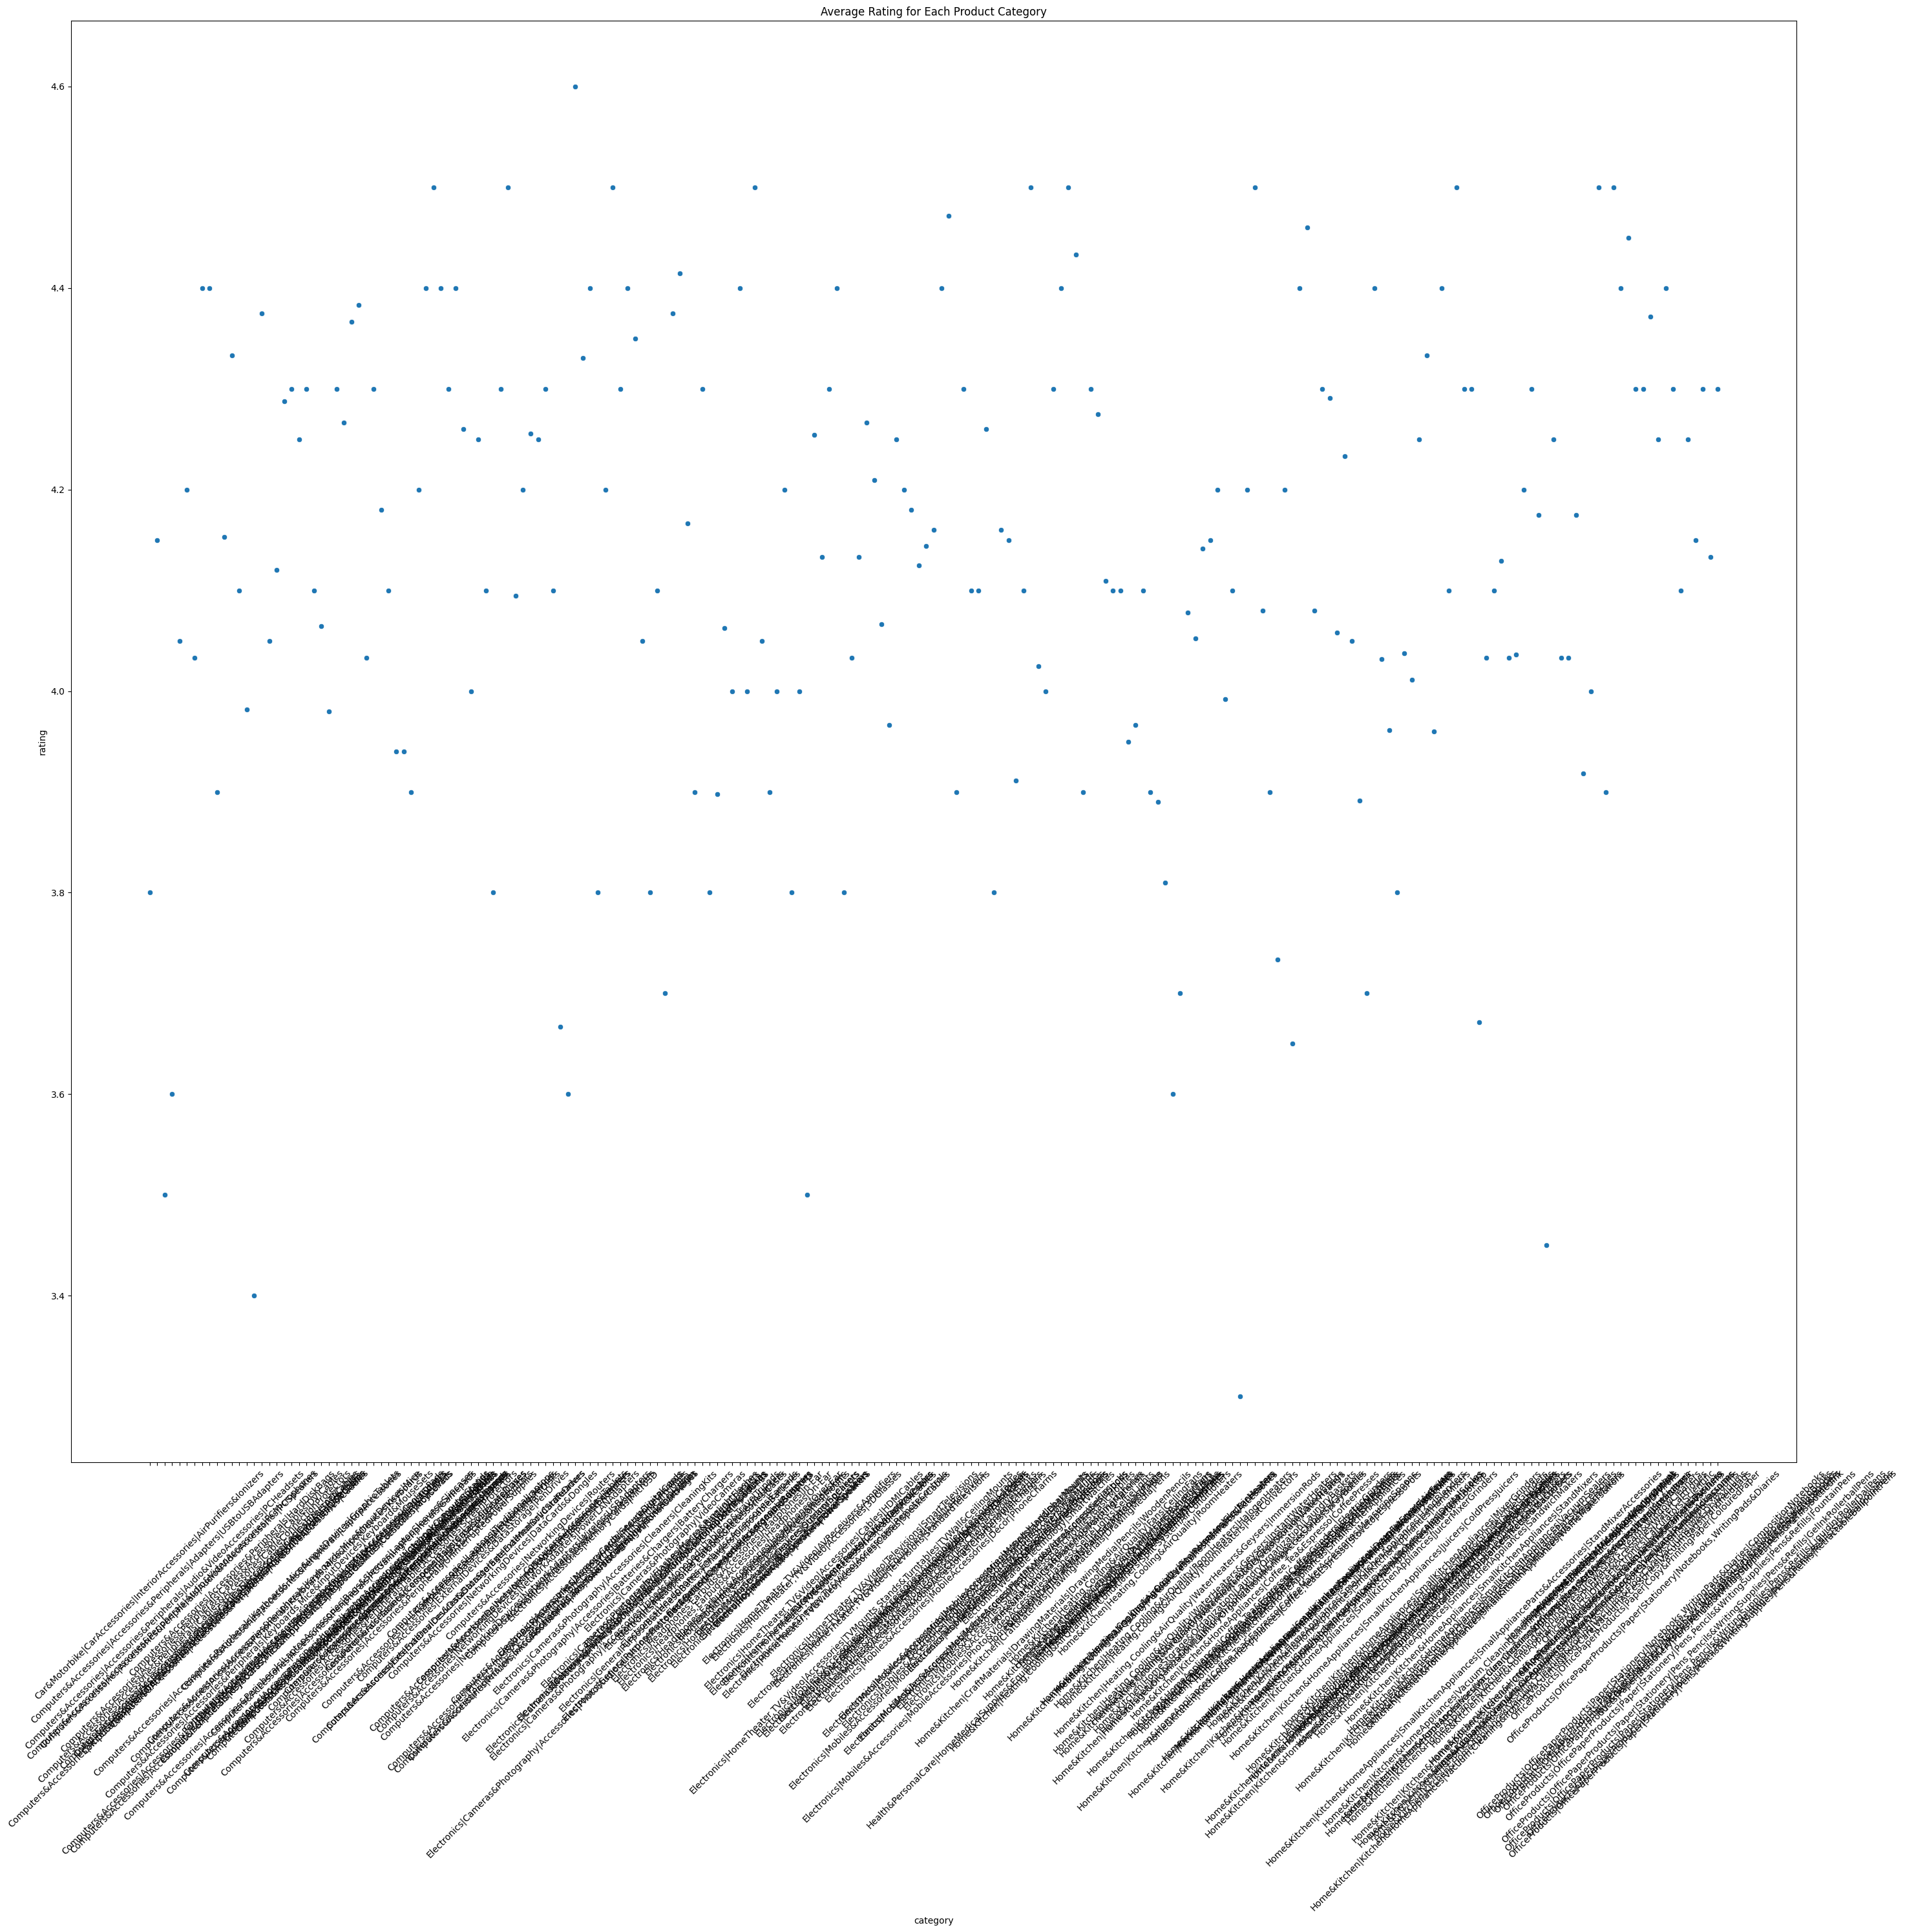

In [34]:
avg_rating = df2.groupby('category')['rating'].mean().reset_index()

print(avg_rating)

plt.figure(figsize=(30,30))
sns.scatterplot(data=avg_rating, x='category', y='rating', palette = "coolwarm")
plt.xticks(rotation=45)
plt.title("Average Rating for Each Product Category")
plt.tight_layout()
plt.show()


# 2. What are the top rating_count products by category.

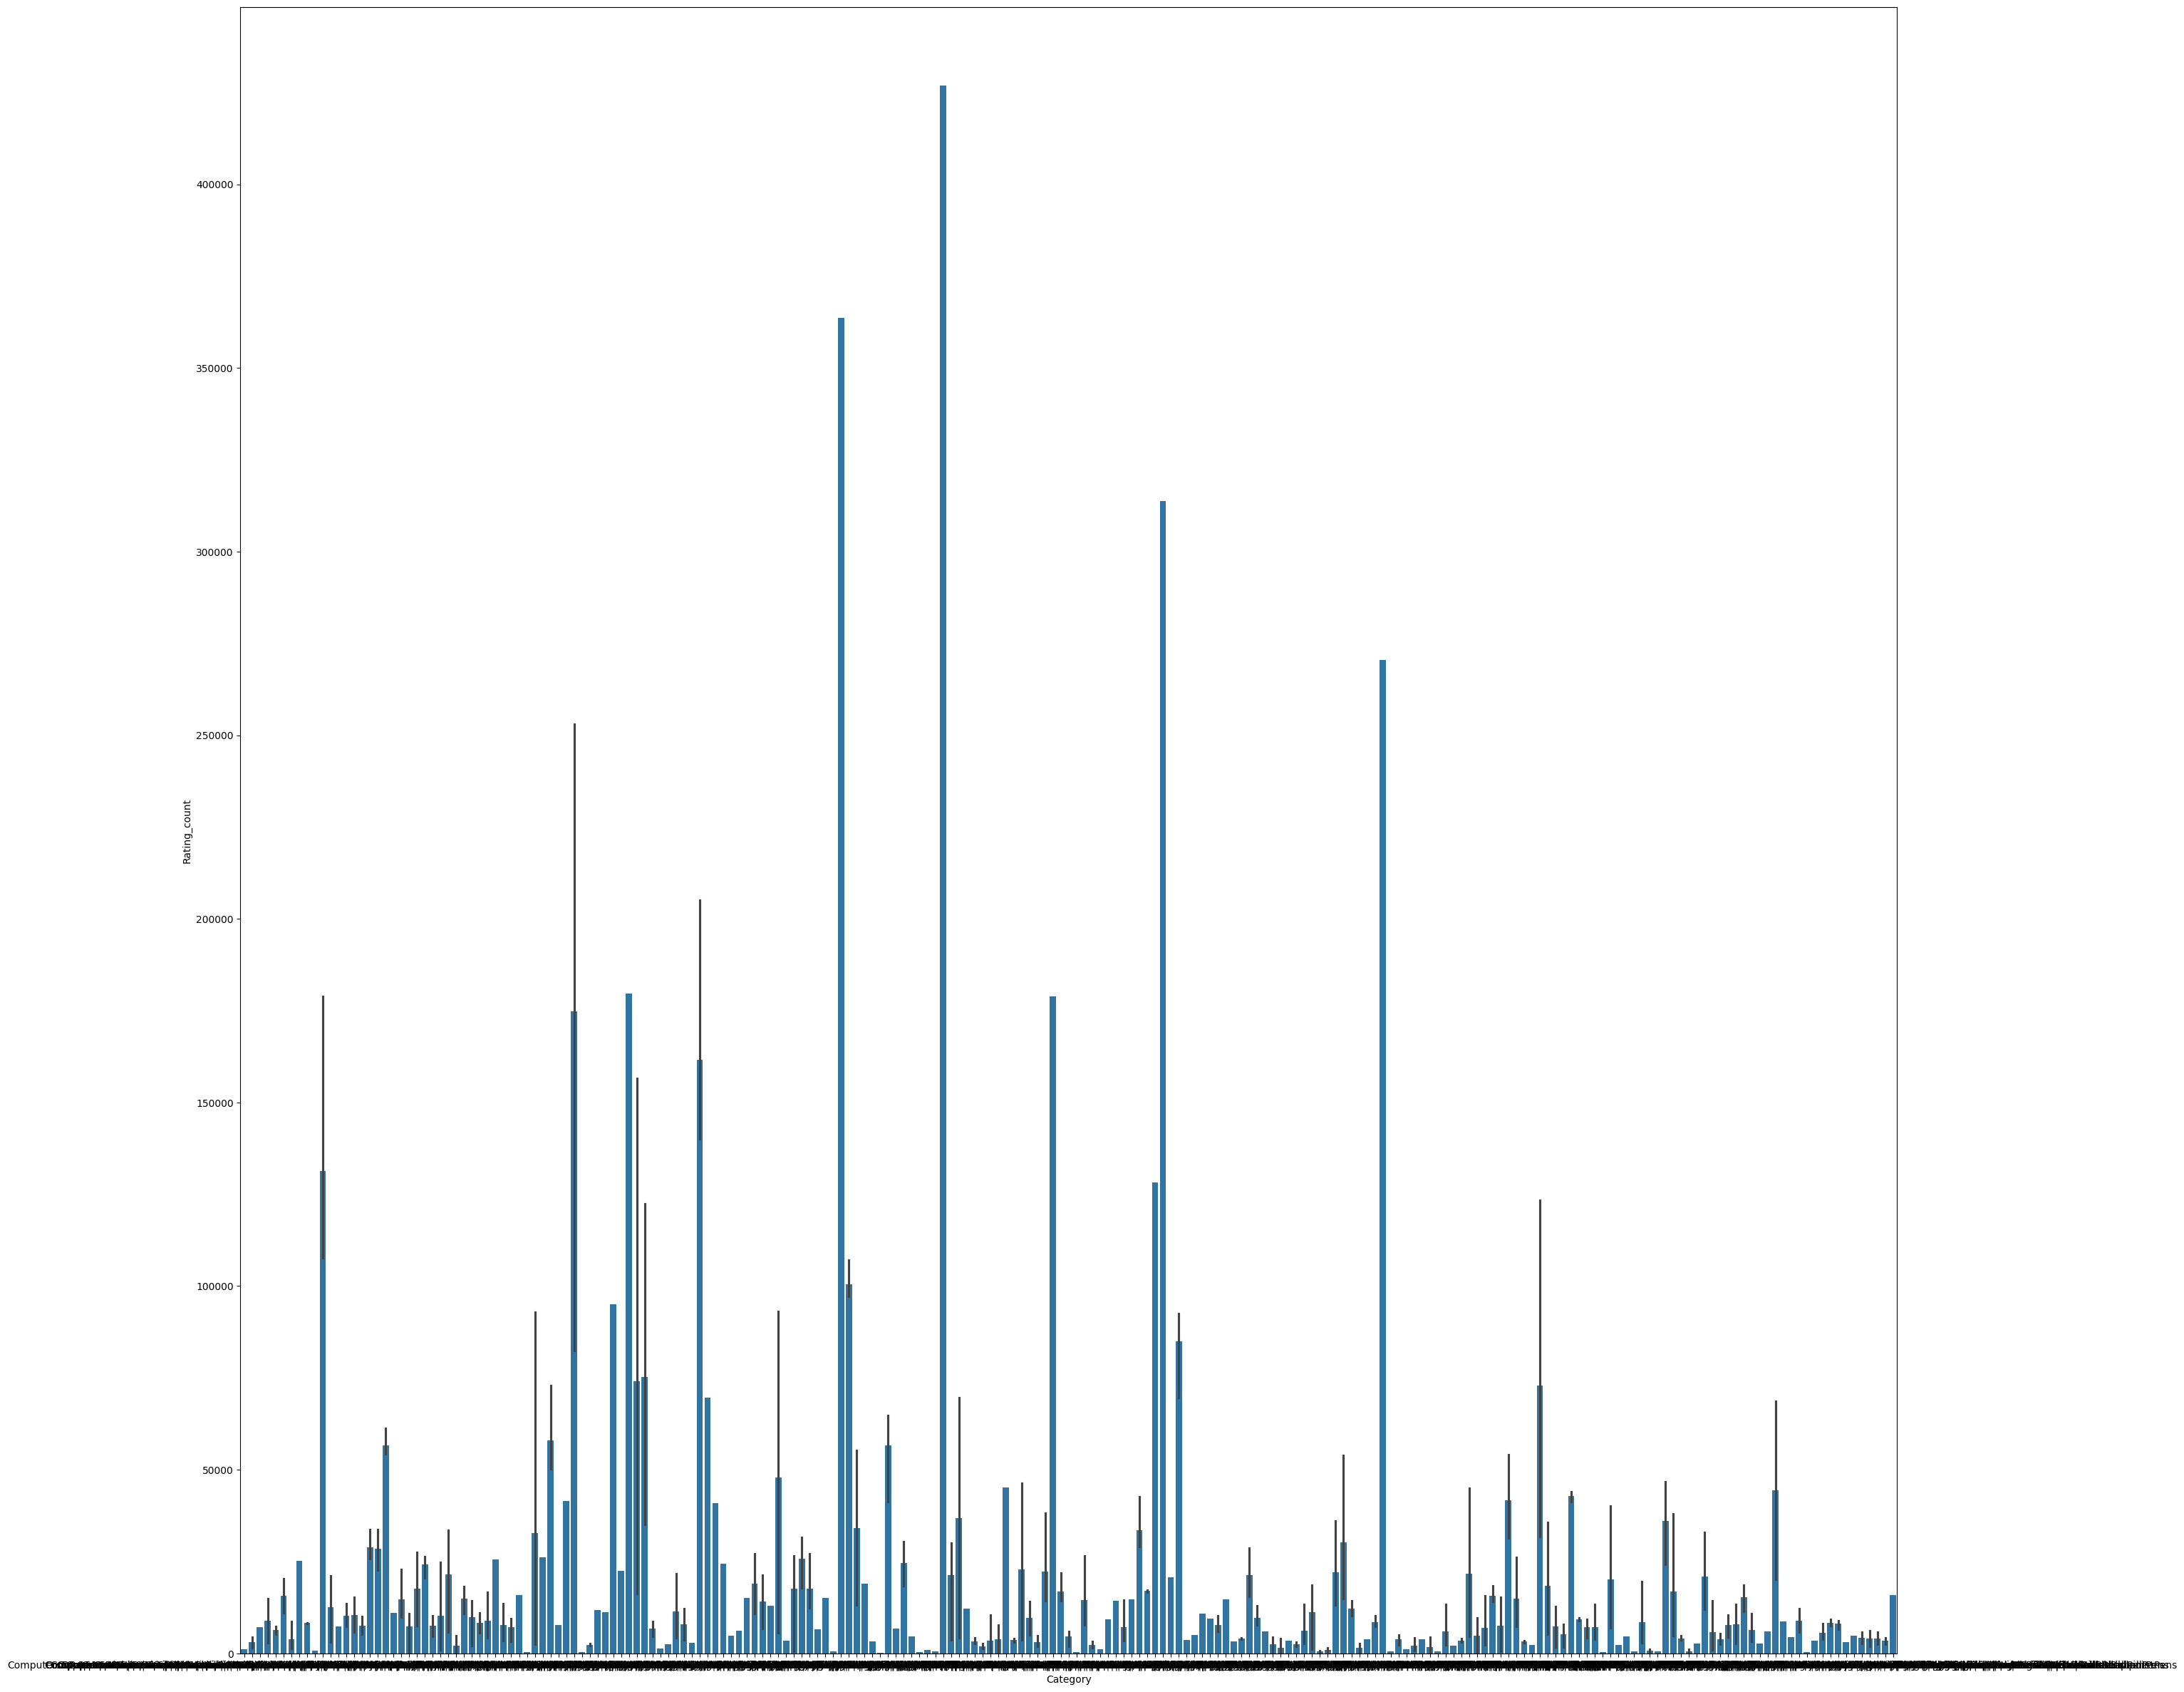

In [38]:
top_products = (df2.sort_values(['category', 'rating_count'], ascending=[True, False]).groupby('category').head(3) )

plt.figure(figsize = (30,30))
sns.barplot(data = top_products, x = "category", y = "rating_count")
plt.xlabel("Category")
plt.ylabel("Rating_count")
plt.show()

# 3. What is the distribution of discounted prices vs. actual prices

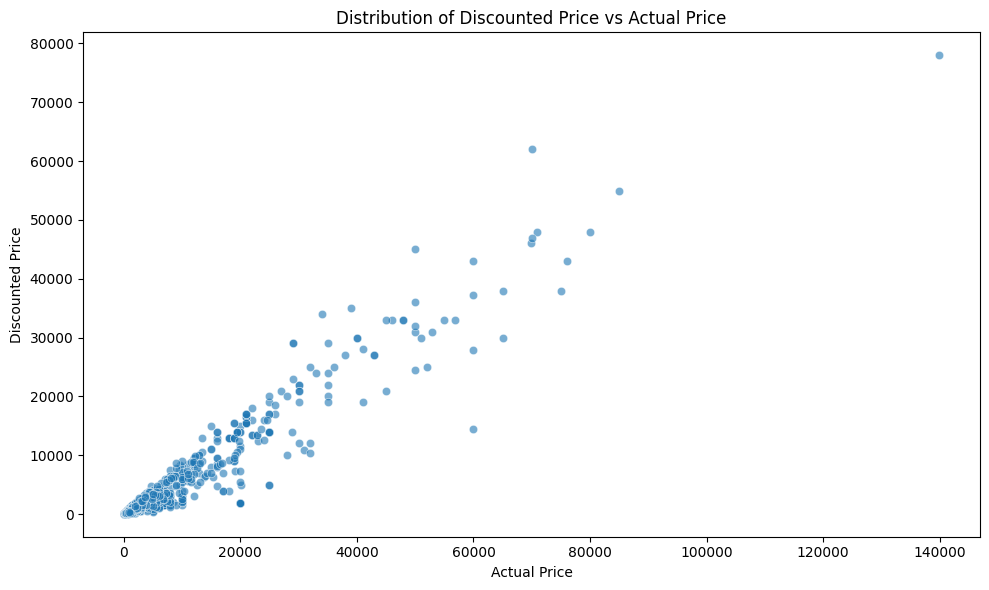

In [36]:
df2.columns = df2.columns.str.lower().str.replace(" ", "_")

plt.figure(figsize=(10,6))
sns.scatterplot(data=df2, x='actual_price', y='discounted_price', alpha=0.6)
plt.title("Distribution of Discounted Price vs Actual Price")
plt.xlabel("Actual Price")
plt.ylabel("Discounted Price")
plt.tight_layout()
plt.show()

# 4. How does the average discount percentage vary across categories

                                              category  discount_percentage
0    Car&Motorbike|CarAccessories|InteriorAccessori...            41.525000
1    Computers&Accessories|Accessories&Peripherals|...            78.387733
2    Computers&Accessories|Accessories&Peripherals|...            35.035035
3    Computers&Accessories|Accessories&Peripherals|...            56.335120
4    Computers&Accessories|Accessories&Peripherals|...            46.719582
..                                                 ...                  ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...             0.000000
207  OfficeProducts|OfficePaperProducts|Paper|Stati...             5.000000
208  OfficeProducts|OfficePaperProducts|Paper|Stati...            17.619048
209  OfficeProducts|OfficePaperProducts|Paper|Stati...            13.074074
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...             0.000000

[211 rows x 2 columns]


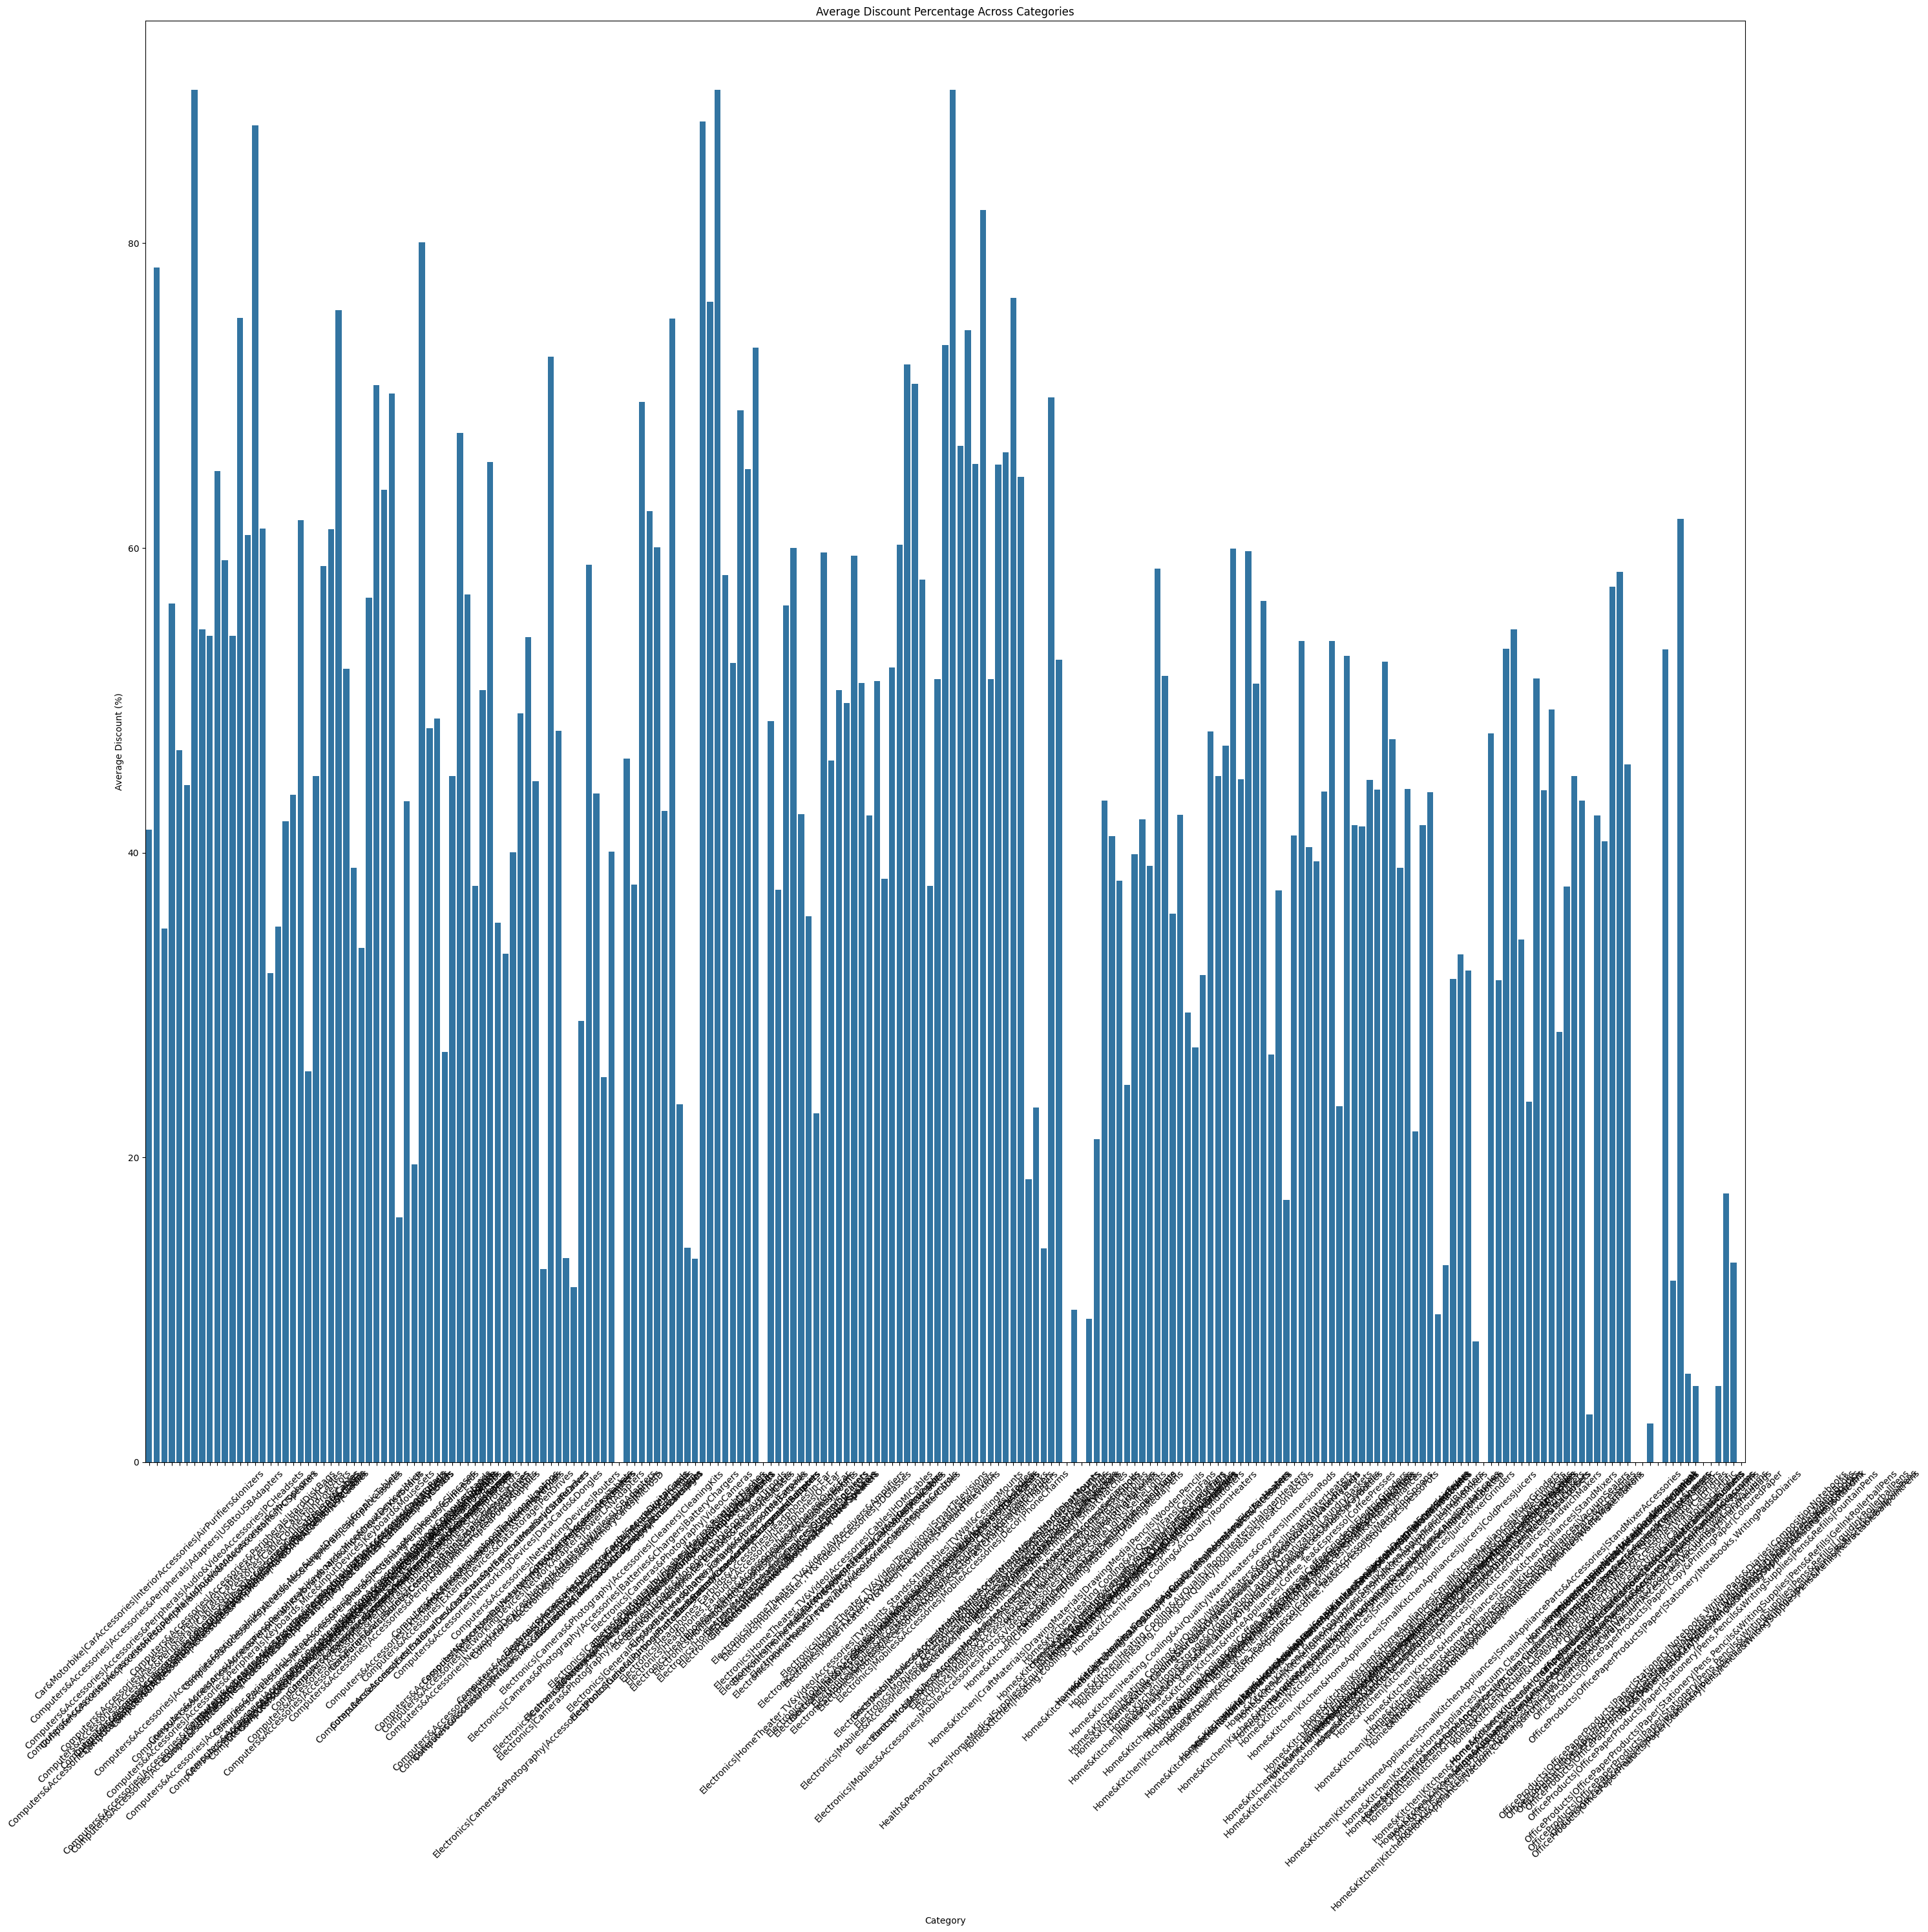

In [39]:
if {'discounted_price', 'actual_price'}.issubset(df2.columns):
    df2['discount_percentage'] = ((df2['actual_price'] - df2['discounted_price']) / df2['actual_price']) * 100

avg_discount = df2.groupby('category')['discount_percentage'].mean().reset_index()

print(avg_discount)

plt.figure(figsize=(30,30))
sns.barplot(data=avg_discount, x='category', y='discount_percentage')
plt.xticks(rotation=45)
plt.title("Average Discount Percentage Across Categories")
plt.ylabel("Average Discount (%)")
plt.xlabel("Category")
plt.tight_layout()
plt.show()

# 5. What are the most popular product names

In [40]:
popular_products = df2['product_name'].value_counts(ascending = False).head(10)
print(popular_products)

product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                            5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                                     4
boAt Micro USB 55 Tangle-free, Sturdy Micro USB Cable with 3A Fast Charging & 480mbps Data Transmission (Black)                                                                                      3
Duracell USB C To Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                      3
boAt A400 USB Type-C to USB-A 2.0 Male Data Cable, 2 Meter (Black)                                                                                                                             

# 6. What are the most popular product keywords

In [59]:
df2

product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category  discounted_price  \
0     Computers&Accessories|Accessories&Peripherals|...             399.0   
1     Computers&Accessories|Accessories&Peripherals|...             199.0   
2     Computers&Accessories|Accessories&Peripherals|...             199.0   
3     Computers&Accessories|Accessories&Peripherals|...             329.0   
4     Computers&Accessories|Accessories&Peripherals|...             154.0   
...                                                 ...               ...   
1460  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...             379.0   
1461  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...            2280.0   
1462  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...            2219.0   
1463  Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...            1399.0   
1464  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...            2863.0   

      actual_price  discount_percentage  rating  rating_count  \
0           1099.0            63.694268     4.2       24269.0   
1            349.0            42.979943     4.0       43994.0   
2           1899.0            89.520800     3.9        7928.0   
3            699.0            52.932761     4.2       94363.0   
4            399.0            61.403509     4.2       16905.0   
...            ...                  ...     ...           ...   
1460         919.0            58.759521     4.0        1090.0   
1461        3045.0            25.123153     4.1        4118.0   
1462        3080.0            27.954545     3.6         468.0   
1463        1890.0            25.978836     4.0        8031.0   
1464        3690.0            22.411924     4.3        6987.0   

                                          about_product  \
0     High Compatibility : Compatible With iPhone 12...   
1     Compatible with all Type C enabled devices, be...   
2     【 Fast Charger& Data Sync】-With built-in safet...   
3     The boAt Deuce USB 300 2 in 1 cable is compati...   
4     [CHARGE & SYNC FUNCTION]- This cable comes wit...   
...                                                 ...   
1460  SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...   
1461                       230 Volts, 400 watts, 1 Year   
1462  International design and styling|Two heat sett...   
1463  Fan sweep area: 230 MM ; Noise level: (40 - 45...   
1464  Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...   

                                                user_id  \
0     AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1     AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2     AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3     AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4     AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   
...                                                 ...   
1460  AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...   
1461  AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...   
1462  AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...   
1463  AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...   
1464  AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...   

                             

In [123]:
df2["product_id"].value_counts().head(10)

product_id
B096MSW6CT    3
B08HDJ86NZ    3
B08CF3B7N1    3
B09NHVCHS9    3
B09C6HXFC1    3
B07JW9H4J1    3
B08DDRGWTJ    3
B07XLCFSSN    3
B09W5XR9RT    3
B077Z65HSD    3
Name: count, dtype: int64

# 7. What are the most popular product reviews

In [45]:
(df2["review_content"].value_counts() >= 8).head(10)

review_content
I am not big on camera usage, personally. I was even mentally prepared for a bad camera, based on some reviews here. But I was pleasantly surprised that camera clicks good photos. They are not awesome, but they are decent photos that can even be shared.Now coming to my biggest grouse; heating issue. The phone started heating up while charging, but it was just a little and so I could have ignored it. But then it started heating up more and got me very concerned. I even ordered a replacement thinking I got a defective piece. But then, after further tests, I found that it is heating more when I download huge amounts of data, for example, when I restore data of my old phone, from back up. This is ok with me as, I don't perform huge data loads regularly, definitely not on phone. Then I tested by running tasks I usually perform such as checking office mails, attending office meeting on phone, watching a video from Amazon Prime, and so on. The phone did not heat up even a littl

# 8. What is the correlation between discounted_price and rating.

In [136]:
df2[["discounted_price", "rating"]].corr(numeric_only = True)

discounted_price    rating
discounted_price          1.000000  0.114947
rating                    0.114947  1.000000

# 9. What are the Top 5 categories based on the highest ratings.

In [139]:
df2.groupby("rating")["category"].max().head(5)

rating
0.0    Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...
2.0    Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...
2.3    Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...
2.6    Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...
2.8    Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...
Name: category, dtype: object

# 10.  Identify any potential areas for improvement or optimization based on the data analysis.

In [56]:
df2[df2["rating"] <= 3.5]

product_id                                       product_name  \
45    B07XJYYH7L  Wecool Nylon Braided Multifunction Fast Chargi...   
82    B08QX1CC14  SKYWALL 81.28 cm (32 inches) HD Ready Smart LE...   
117   B08RP2L2NL  King Shine Multi Retractable 3.0A Fast Charger...   
142   B08RX8G496  LRIPL Mi Remote Control with Netflix & Prime V...   
154   B0117H7GZ6  GENERIC Ultra-Mini Bluetooth CSR 4.0 USB Dongl...   
...          ...                                                ...   
1446  B09NFSHCWN  Hilton Quartz Heater 400/800-Watt ISI 2 Rods M...   
1449  B0BBLHTRM9  IONIX Tap filter Multilayer | Activated Carbon...   
1454  B08ZXZ362Z  akiara - Makes life easy Mini Sewing Machine f...   
1456  B0B9JZW1SQ  4 in 1 Handheld Electric Vegetable Cutter Set,...   
1459  B0B3JSWG81  NGI Store 2 Pieces Pet Hair Removers for Your ...   

                                               category  discounted_price  \
45    Computers&Accessories|Accessories&Peripherals|...             333.0   
82    Electronics|HomeTheater,TV&Video|Televisions|S...            7299.0   
117   Computers&Accessories|Accessories&Peripherals|...             347.0   
142   Electronics|HomeTheater,TV&Video|Accessories|R...             655.0   
154   Computers&Accessories|NetworkingDevices|Networ...             249.0   
...                                                 ...               ...   
1446  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...            1149.0   
1449  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...             199.0   
1454  Home&Kitchen|Kitchen&HomeAppliances|SewingMach...            1563.0   
1456  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...             498.0   
1459  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...             199.0   

      actual_price  discount_percentage  rating  rating_count  \
45           999.0                 67.0     3.3        9792.0   
82         19125.0                 62.0     3.4         902.0   
117          999.0                 65.0     3.5        1121.0   
142         1099.0                 40.0     3.2         285.0   
154          399.0                 38.0     3.4        4642.0   
...            ...                  ...     ...           ...   
1446        1899.0                 39.0     3.5          24.0   
1449         699.0                 72.0     2.9         159.0   
1454        3098.0                 50.0     3.5        2283.0   
1456        1200.0                 59.0     3.2         113.0   
1459         999.0                 80.0     3.1           2.0   

                                          about_product  \
45    Special Features Of The Universal Cable: This ...   
82    Resolution: Full HD (1920 x 1080) | Refresh Ra...   
117   One for All: Charge any of your devices with t...   
142   This Voice Command Compatible Remote is for Mi...   
154   Item design may vary as per stock availability...   
...                                                 ...   
1446  Comes with 2 Quartz heating tubes providing mo...   
1449  Faucet Water Filter: Built-in layered filter c...   
1454  PORTABLE MINI SEWING MACHINE with threads and ...   
1456  { 4 in 1 multi-function Electric Vegetable Cut...   
1459  Versatile, Protects Your Clothes: MoveCatcher ...   

                                                user_id  \
45    AE47XF2766XJOEOI42DVP2HMB4YQ,AH6JPV326WGUKC2J4...   
82    AFZBEV4BOWGRSEH2PK7D65ZW66PA,AFXQ3YGENWMRX36NX...   
117   AEZDBVRL3E3S2Q2C7LEY3TTQVVFA,AGASCT5TE6VHAHRFT...   
142   AHGHFJXREBY4F2LI3M6SFLSWC75Q,AFZWM3VVEIMWNFSTQ...   
154   AGG2AULXZCI6G44ST3BNAHRWDR5Q,AHR35WVPGLH745QHW...   
...                                                 ...   
1446  AGYWNEMMI425KXXTZCVB7FOQBWNA,AHFXBNDCOX7XWOQ3A...   
1449  AF6LRVDRKYWPTZXZLQERZ3LXCWDA,AG7FU75LA5ONPMNEV...   
1454  AEHOZYTOH5VUWA2Z7OB672WX4F5A,AEF3QNOCDEMLINRVM...   
1456  AFCTMQKPVJI6Y2JPIGDKRKIAV43A,AF6XUHN32GSFA7LFG...   
1459                       AFPKVN5KLHB4MHSYDS25Q5MIWWKQ   

                             

# EDA 4.

In [110]:
df3 = pd.read_csv("spotify.csv")

In [111]:
df3

Artist                                         Track Name  \
0             Drake            Rich Baby Daddy (feat. Sexyy Red & SZA)   
1             Drake                                          One Dance   
2             Drake                                 IDGAF (feat. Yeat)   
3             Drake               First Person Shooter (feat. J. Cole)   
4             Drake                      Jimmy Cooks (feat. 21 Savage)   
..              ...                                                ...   
435  French Montana                                    Splash Brothers   
436         Fat Joe                     All The Way Up (feat. Infared)   
437       A$AP Ferg  Work REMIX (feat. A$AP Rocky, French Montana, ...   
438           Diddy                Another One Of Me (feat. 21 Savage)   
439       Rick Ross                                       Stay Schemin   

     Popularity  Duration (ms)                Track ID  
0            92         319191  1yeB8MUNeLo9Ek1UEpsyz6  
1            91         173986  1zi7xx7UVEFkmKfv06H8x0  
2            90         260111  2YSzYUF3jWqb9YP9VXmpjE  
3            88         247444  7aqfrAY2p9BUSiupwk3svU  
4            88         218364  3F5CgOj3wFlRv51JsHbxhe  
..          ...            ...                     ...  
435          44         221863  3fBsEOnzwtlkpS0LxXAZhN  
436          64         191900  7Ezwtgfw7khBrpvaNPtMoT  
437          69         283693  7xVLFuuYdAvcTfcP3IG3dS  
438          65         220408  4hGmQboiou09EwhcTWa0H6  
439          68         267720  0nq6sfr8z1R5KJ4XUk396e  

[440 rows x 5 columns]

# 1.  Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.

In [112]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [113]:
df3.isnull().sum()

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [114]:
df3.duplicated().sum()

np.int64(27)

In [115]:
df3.drop_duplicates(inplace = True)

In [116]:
df3.duplicated().sum()

np.int64(0)

# 2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

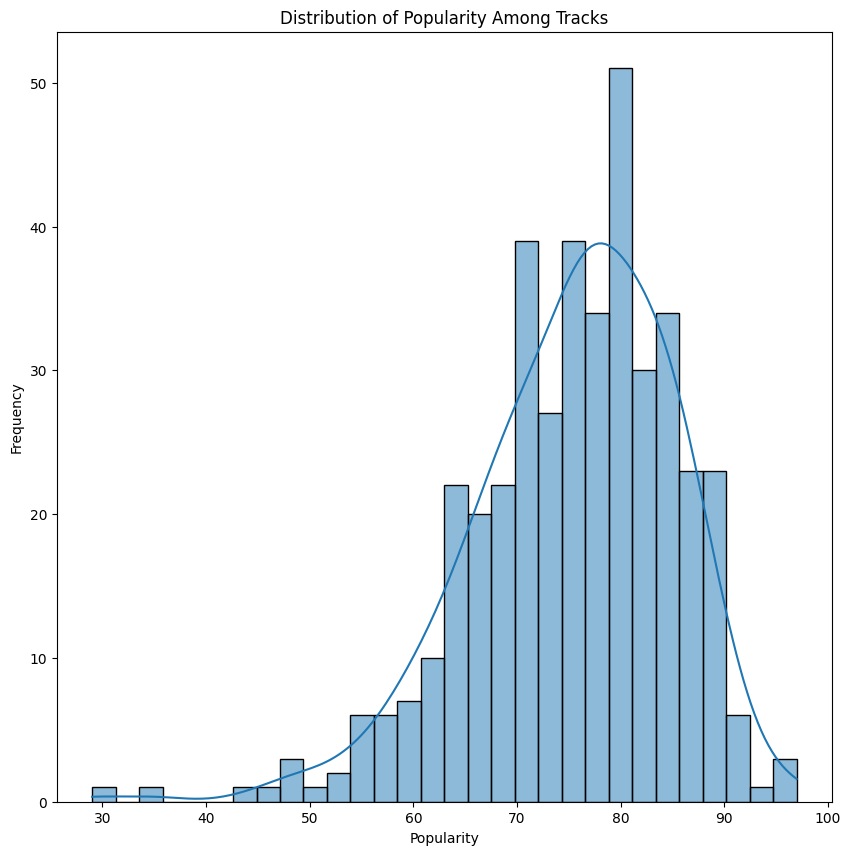

In [117]:
plt.figure(figsize=(10,10))
sns.histplot(df3["Popularity"], bins=30, kde=True)
plt.title("Distribution of Popularity Among Tracks")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()

# 3.  Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

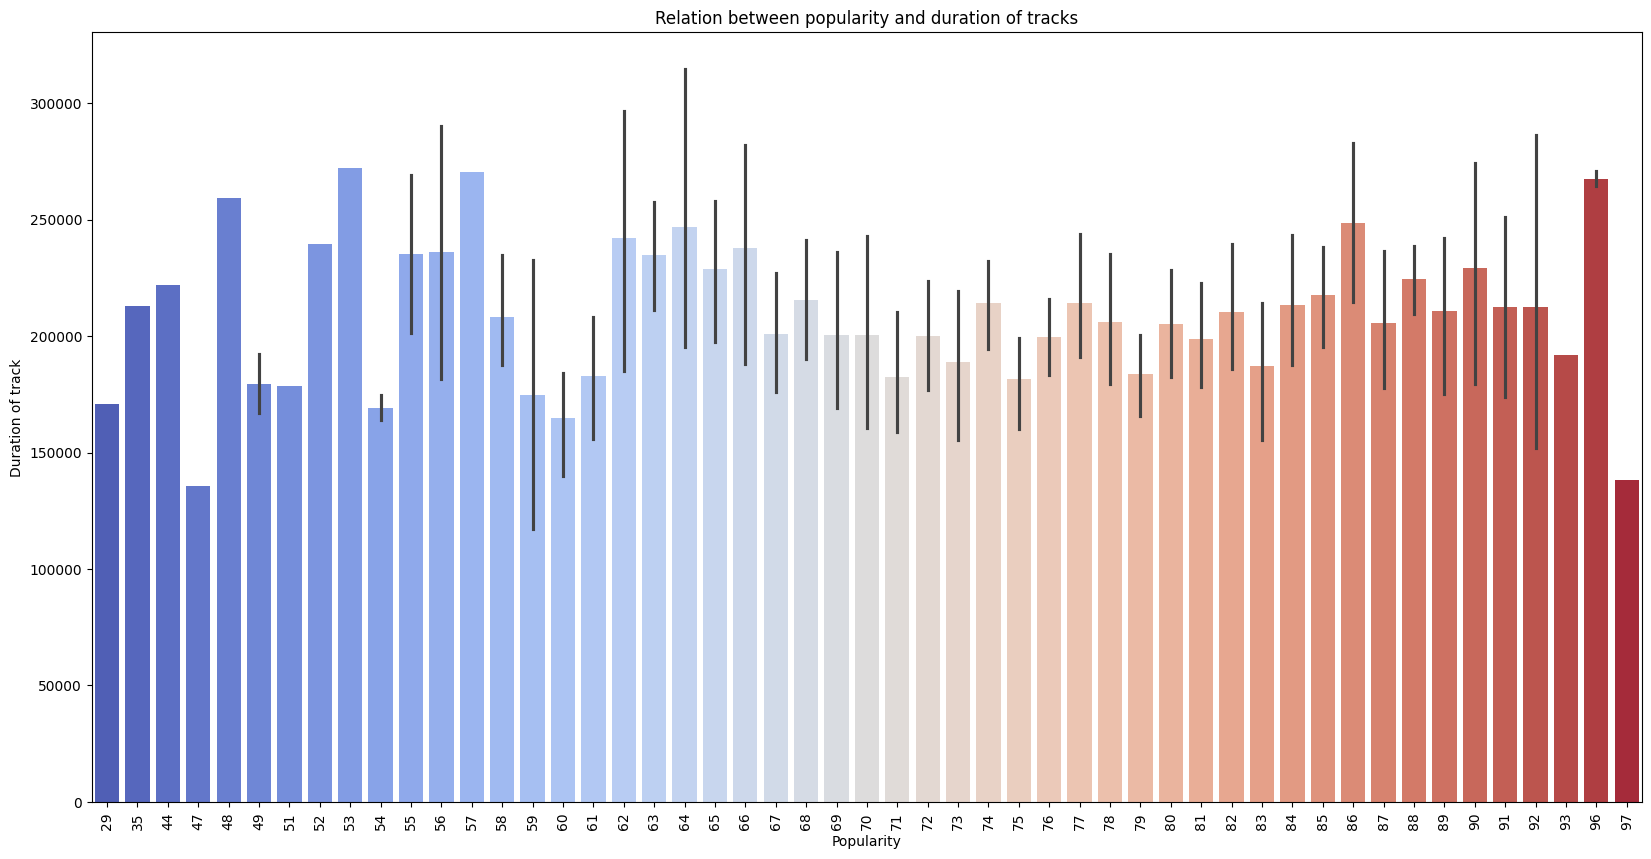

In [122]:
plt.figure(figsize = (20,10))
sns.barplot(x = "Popularity", y = "Duration (ms)", data = df3, palette = "coolwarm")
plt.title("Relation between popularity and duration of tracks")
plt.xlabel("Popularity")
plt.ylabel("Duration of track")
plt.xticks(rotation = 90)
plt.show()

# 4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot

In [126]:
df3["Artist"].value_counts()

Artist
Drake          17
Eminem         11
Lil Nas X      10
JAY-Z          10
21 Savage      10
               ..
Lil Tjay        1
BigXthaPlug     1
Fat Joe         1
A$AP Ferg       1
Diddy           1
Name: count, Length: 115, dtype: int64

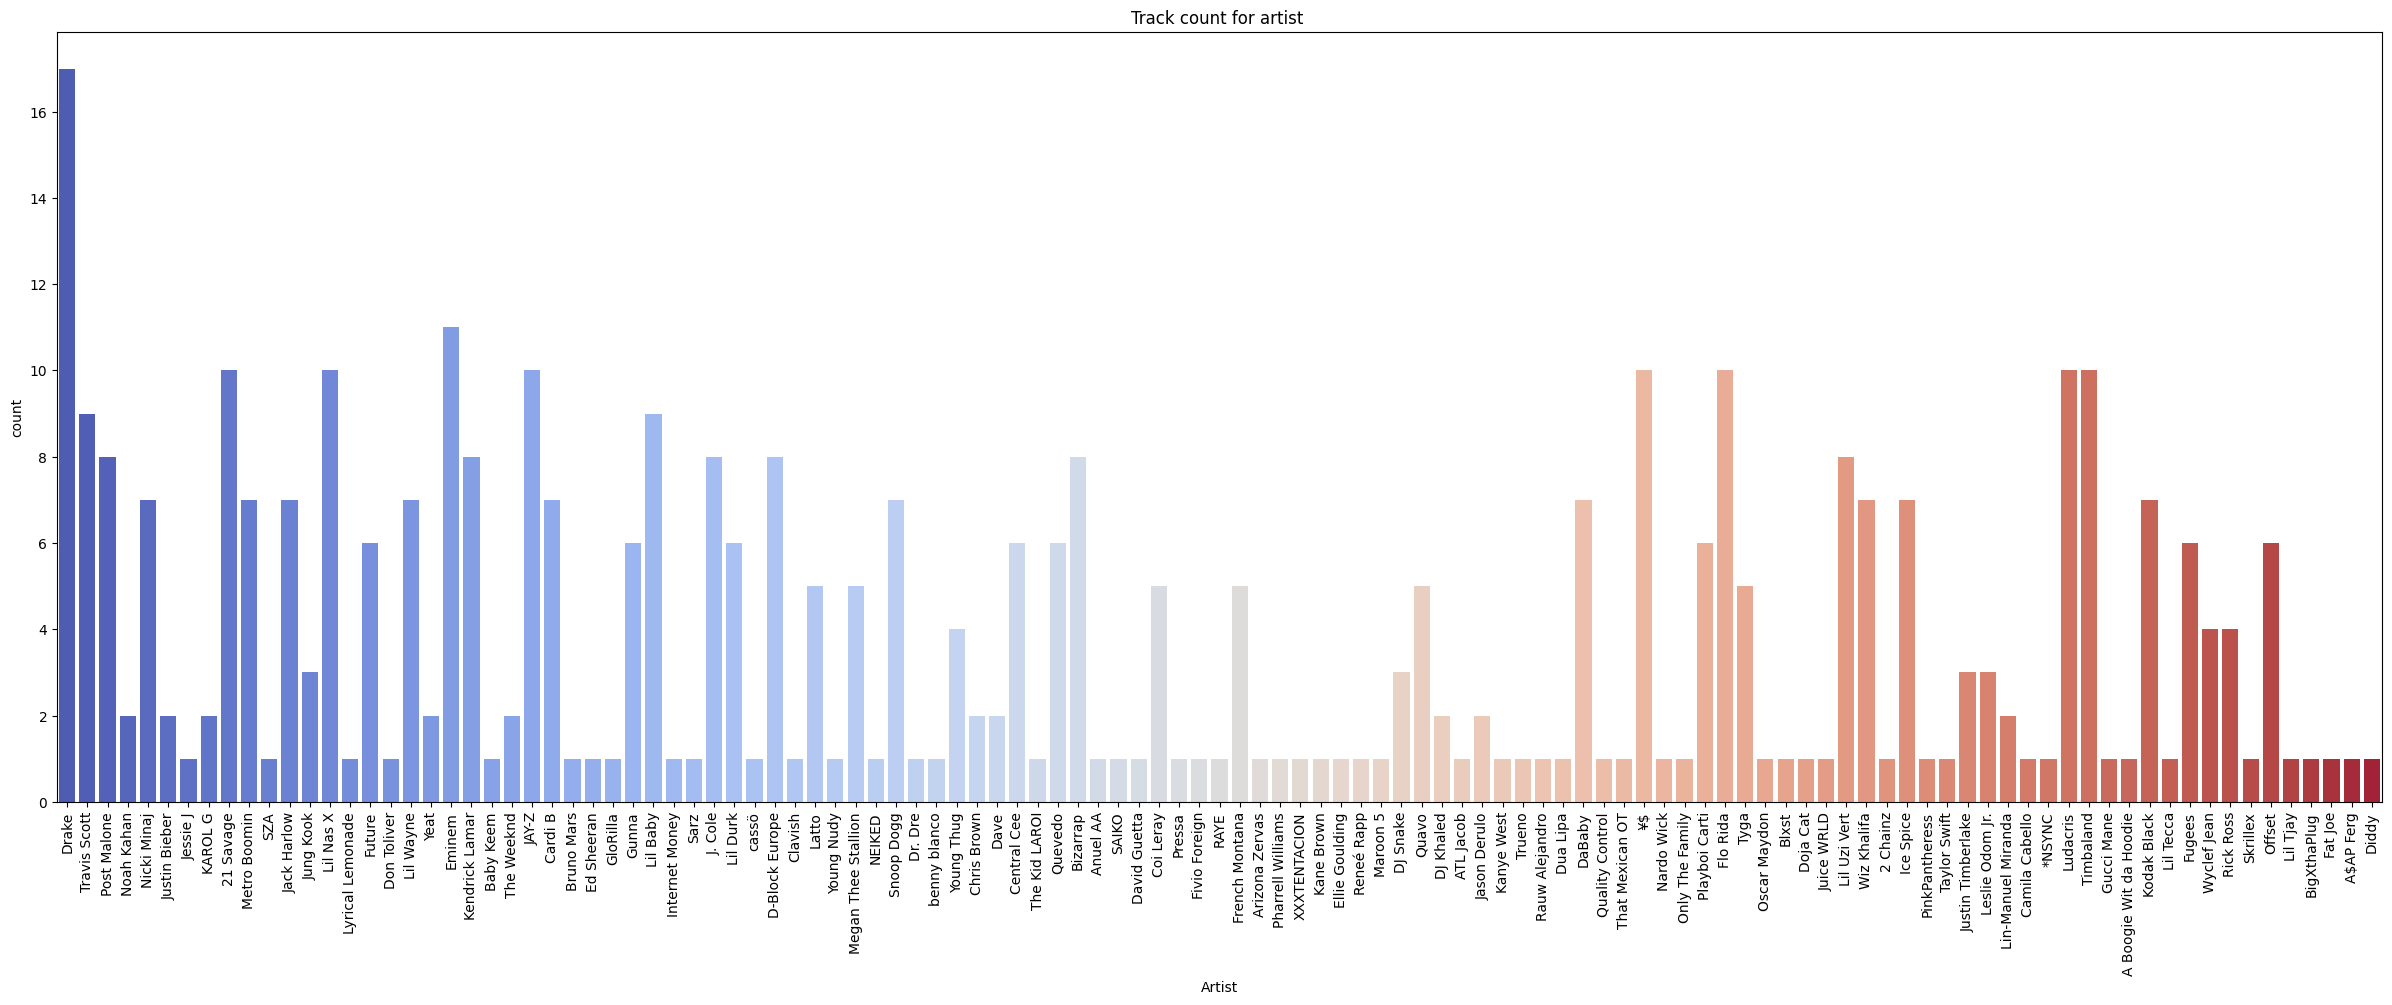

In [130]:
plt.figure(figsize = (30,10))
sns.countplot(x = df3["Artist"] , palette = "coolwarm")
plt.title("Track count for artist ")
plt.xticks(rotation = 90)
plt.show()

# 5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [131]:
artist_col = "Artist"
track_col  = "Track Name"
pop_col    = "Popularity"

least_popular = (df3[[artist_col, track_col, pop_col]].sort_values(by=pop_col, ascending=True).dropna(subset=[pop_col]).head(5).reset_index(drop=True))

print(least_popular)

           Artist                     Track Name  Popularity
0          Pressa  Attachments (feat. Coi Leray)          29
1   Justin Bieber                     Intentions          35
2  French Montana                Splash Brothers          44
3        Lil Baby                  On Me - Remix          47
4     Wyclef Jean      911 (feat. Mary J. Blige)          48


# 6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist

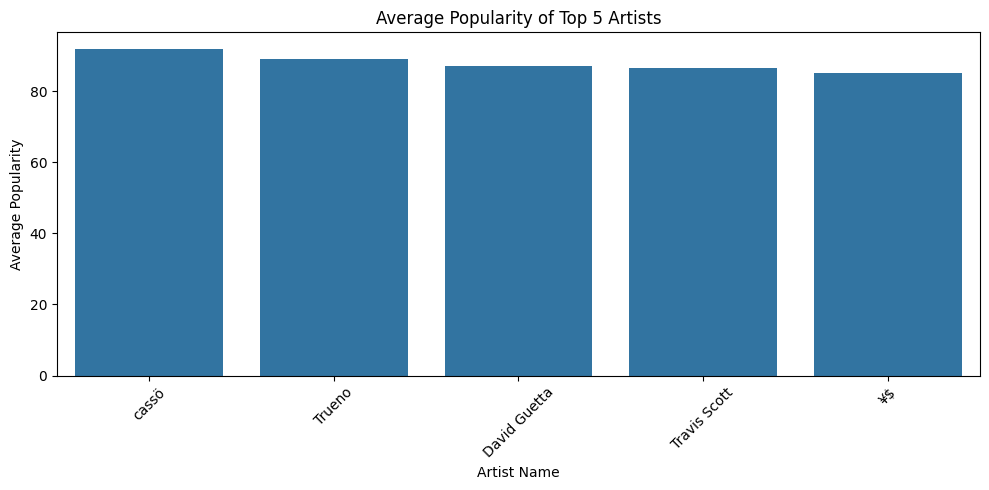

In [133]:
artist_popularity = (df3.groupby("Artist")["Popularity"].mean().reset_index().sort_values("Popularity", ascending=False))

top5 = artist_popularity.head(5)

plt.figure(figsize=(10,5))
sns.barplot(data=top5, x="Artist", y="Popularity")
plt.title("Average Popularity of Top 5 Artists")
plt.xlabel("Artist Name")
plt.ylabel("Average Popularity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

In [147]:
artist_col = "Artist"
track_col = "Track Name"
pop_col = "Popularity"

top_artists = (df3.groupby(artist_col)[pop_col].mean().sort_values(ascending=False).head(5).index)

result = (df3[df3[artist_col].isin(top_artists)].sort_values([artist_col, pop_col], ascending=[True, False]).groupby(artist_col).first()[[track_col, pop_col]])

print("Most popular track for each of the top 5 artists:")
print(result)

Most popular track for each of the top 5 artists:
                                Track Name  Popularity
Artist                                                
David Guetta            Baby Don't Hurt Me          87
Travis Scott    FE!N (feat. Playboi Carti)          93
Trueno        Mamichula - con Nicki Nicole          89
cassö                                Prada          92
¥$                                CARNIVAL          96


# 8. Visualize relationships between multiple numerical variables simultaneously using a pair plot

<Figure size 1200x1000 with 0 Axes>

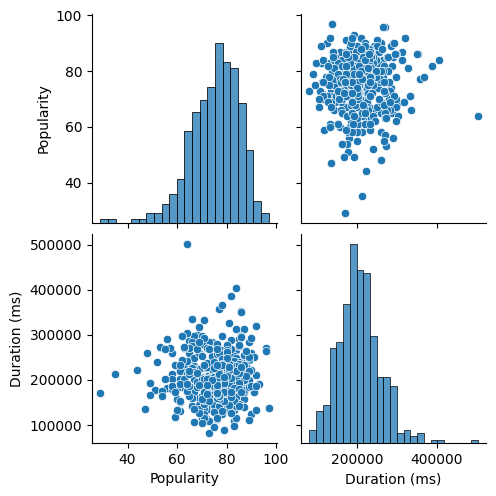

In [148]:
num_cols = df3.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 10))
sns.pairplot(num_cols, diag_kind='hist')
plt.show()

# 9.  Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot

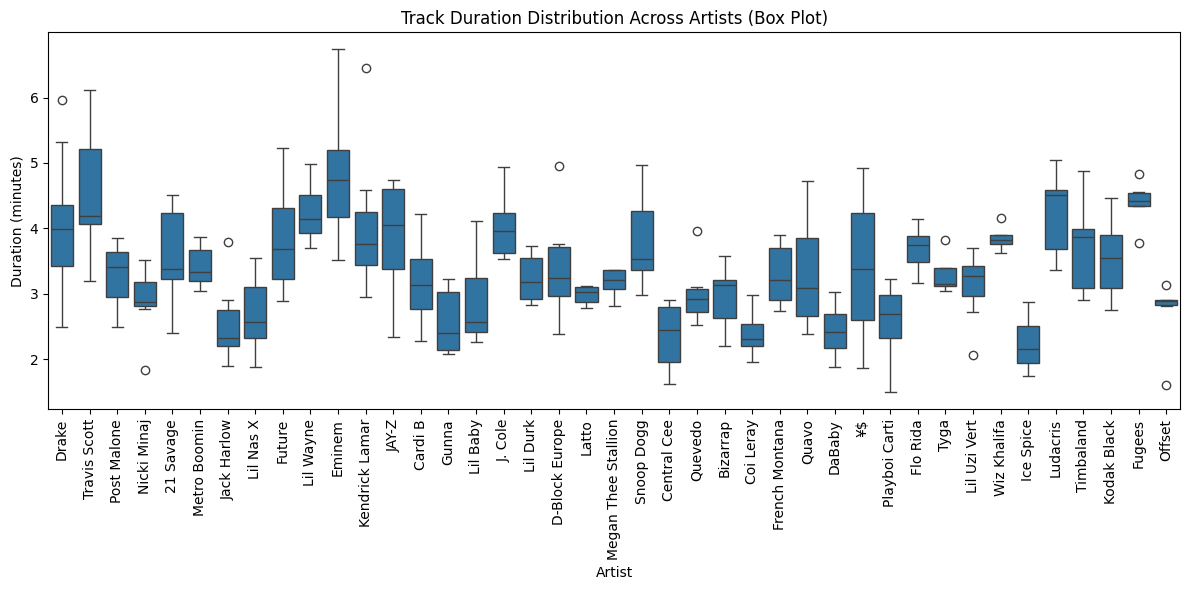

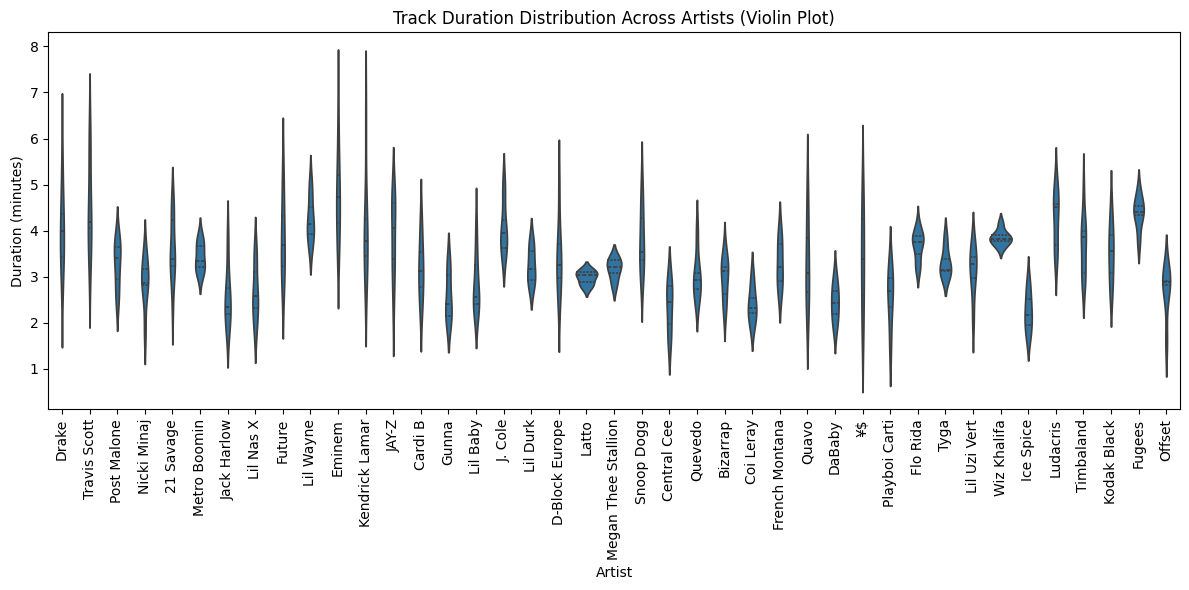

In [153]:
df3['Duration_min'] = df3['Duration (ms)'] / 60000

artist_counts = df3['Artist'].value_counts()
valid_artists = artist_counts[artist_counts >= 5].index
df_filtered = df3[df3['Artist'].isin(valid_artists)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='Artist', y='Duration_min')
plt.xticks(rotation=90)
plt.title("Track Duration Distribution Across Artists (Box Plot)")
plt.xlabel("Artist")
plt.ylabel("Duration (minutes)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(data=df_filtered, x='Artist', y='Duration_min', inner="quartile")
plt.xticks(rotation=90)
plt.title("Track Duration Distribution Across Artists (Violin Plot)")
plt.xlabel("Artist")
plt.ylabel("Duration (minutes)")
plt.tight_layout()
plt.show()


# 10.  How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot

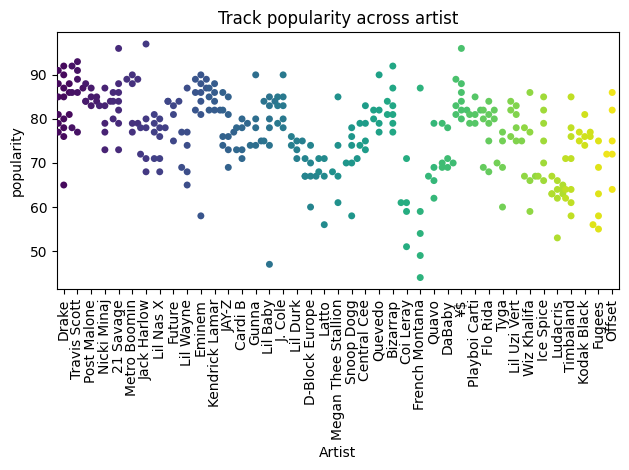

In [154]:
artist_counts = df3['Artist'].value_counts()
valid_artists = artist_counts[artist_counts >= 5].index
df_filtered = df3[df3['Artist'].isin(valid_artists)]

sns.swarmplot(data = df_filtered, x = "Artist", y = "Popularity", palette = "viridis")
plt.xticks(rotation=90)
plt.title("Track popularity across artist")
plt.xlabel("Artist")
plt.ylabel("popularity")
plt.tight_layout()
plt.show()

In [155]:
df3['Artist'].value_counts()

Artist
Drake          17
Eminem         11
Lil Nas X      10
JAY-Z          10
21 Savage      10
               ..
Lil Tjay        1
BigXthaPlug     1
Fat Joe         1
A$AP Ferg       1
Diddy           1
Name: count, Length: 115, dtype: int64

In [158]:
artist_counts[artist_counts >= 5].index

Index(['Drake', 'Eminem', 'Lil Nas X', 'JAY-Z', '21 Savage', 'Flo Rida', '¥$',
       'Timbaland', 'Ludacris', 'Travis Scott', 'Lil Baby', 'Bizarrap',
       'Post Malone', 'D-Block Europe', 'Lil Uzi Vert', 'Kendrick Lamar',
       'J. Cole', 'Metro Boomin', 'Cardi B', 'Ice Spice', 'DaBaby',
       'Wiz Khalifa', 'Nicki Minaj', 'Jack Harlow', 'Lil Wayne', 'Snoop Dogg',
       'Kodak Black', 'Lil Durk', 'Central Cee', 'Gunna', 'Quevedo',
       'Playboi Carti', 'Offset', 'Fugees', 'Future', 'Tyga', 'Quavo',
       'French Montana', 'Coi Leray', 'Latto', 'Megan Thee Stallion'],
      dtype='object', name='Artist')